# Fake News Detection: A Hybrid Approach Combining Linguistic Features and Transformer Models by Anita Okojie-Aidonojie

## Introduction

In today's digital information ecosystem, the proliferation of fake news presents significant challenges to public discourse, democratic processes, and informed decision-making. This project develops and evaluates machine learning models to automatically detect fake news articles by analysing linguistic patterns, semantic content, and stylistic features.

## Research Question

**How can I develop an effective machine learning model that combines linguistic features with transformer-based representations to accurately classify news articles as genuine or fake, with particular focus on identifying subtle linguistic patterns that distinguish fake news while providing explainable results?**

This question addresses the need for fake news detection systems that not only achieve high accuracy but also provide interpretable insights into the linguistic and semantic characteristics that differentiate deceptive content from genuine news articles.

## Literature Review

### Hybrid Approaches to Fake News Detection

Recent research has demonstrated that hybrid models combining multiple analysis techniques often outperform single-approach methods. According to Zhang & Ghorbani (p. 11), "the verification of a piece of news can not only depend on the news content, creator of the news, and social context of the news are also influential facotrs."

Hybrid architecture approaches have shown considerable promise. Scott et al. (2021) proposed Cross-SEAN, "a cross-stitch-based semi-supervised end-to-end neural attention model which leverages the large amount of unlabelled data" (p. 1) for COVID-19 fake news detection. Their model achieved 95.4% accuracy by combining tweet text, external knowledge, tweet features, and user features.

Similarly, Kaliyar et al. (2021) demonstrated that a hybrid CNN-LSTM model (C-LSTM) combining "convolutional layers having different kernel sizes with LSTM layers followed by three dense layers" (p. 1067) achieved 91.88% accuracy on the PHEME dataset and 98.62% on a COVID-19 dataset. These results significantly outperformed traditional machine learning approaches like Random Forest (63.00%) and Naive Bayes (68.15%).

### Linguistic Features for Fake News Detection

Zhang and Ghorbani (p. 19) confirm that "Linguistic and syntactic-based features are still valuable sources for suspicious news analysis." These include:

1. **Word-level features**: Bag-of-words, n-grams, TF-IDF, and presence of special tokens (Zhang & Ghorbani, 2020)
2. **Style-based features**: Differences in writing styles between genuine and fake news authors
3. **Sentiment analysis**: Fake content often exhibits more polarized sentiment compared to genuine news
4. **Readability metrics**: Analyzing text complexity and structure

Scott et al. (2021) found that "the average sentiment polarity for fake tweets is 0.05 compared to 0.096 in genuine tweets," indicating that fake news tends toward more negative and neutral sentiment. (p. 12)

### Transformer-Based Models

Deep learning approaches, particularly transformers, have shown "dramatic potential in natural language processing" for fake news detection (Zhang & Ghorbani, 2020, p.17). These models can process raw text data and automatically discover representations, eliminating the need for manual feature engineering.

Recent approaches incorporate BERT and other transformer architectures for contextual embeddings. For example, Cross-SEAN uses "Sentence BERT to find contextual embedding of the external knowledge" to enhance detection capabilities (Scott et al., 2021).

### Interpretability in Fake News Detection

As fake news detection becomes increasingly important, model interpretability has gained attention. (Zhang & Ghorbani, 2020) note that explainable AI approaches like LIME can provide "diverse and in-depth perspectives for representation of online fake news."

Attention mechanisms have proven particularly useful, as they have "the ability of 'attending to' particular parts of the input when processing the data" (Scott et al., 2021, p. 6), allowing models to highlight suspicious content for human review.

## Research Gaps in Current Approaches

Despite the significant advances in fake news detection research, this literature review reveals several important gaps that my work aims to address:

1. **Integration Limitations**: While hybrid models like Kaliyar et al.'s CNN-LSTM (2021) and Scott et al.'s Cross-SEAN (2021) combine different neural architectures, they typically use fixed integration methods. Few studies have explored multiple fusion techniques to optimize the combination of different feature types.

2. **Limited Linguistic-Semantic Balance**: Most current approaches either rely heavily on linguistic features with limited semantic understanding or use powerful semantic models (transformers) while neglecting linguistic patterns. Many transformer-based approaches disregard valuable linguistic signals that could enhance detection accuracy.

3. **Interpretability-Performance Tradeoff**: High-performing models often sacrifice interpretability, creating a barrier to practical implementation. The potential for explainability offered by attention mechanisms is rarely fully utilized in hybrid architectures.

4. **Domain-Specific Evaluation**: Few studies evaluate performance across different news categories or domains. This is crucial because, as demonstrated by Kaliyar et al.'s (2021) varying results across datasets (91.88% on PHEME vs. 98.62% on FN-COV), fake news detection effectiveness can differ significantly by subject matter.

These gaps highlight the need for a more comprehensive approach that effectively combines linguistic features with transformer embeddings, offers multiple fusion methods, maintains interpretability, and evaluates performance across different news categories. My hybrid model aims to address these limitations while building upon the strengths of existing approaches.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset downloaded to: C:\Users\Anita\.cache\kagglehub\datasets\clmentbisaillon\fake-and-real-news-dataset\versions\1
Loading and preprocessing datasets...
Dataset shape: (44898, 5)

Columns: ['title', 'text', 'subject', 'date', 'label']

First few rows:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  l

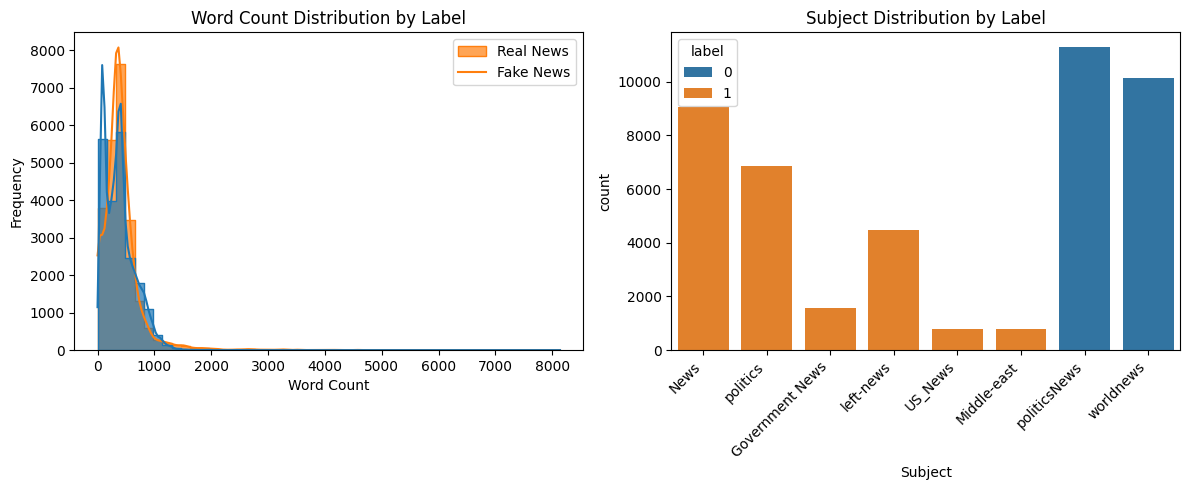

Cleaning text data...
Analyzing most common words in real and fake news...


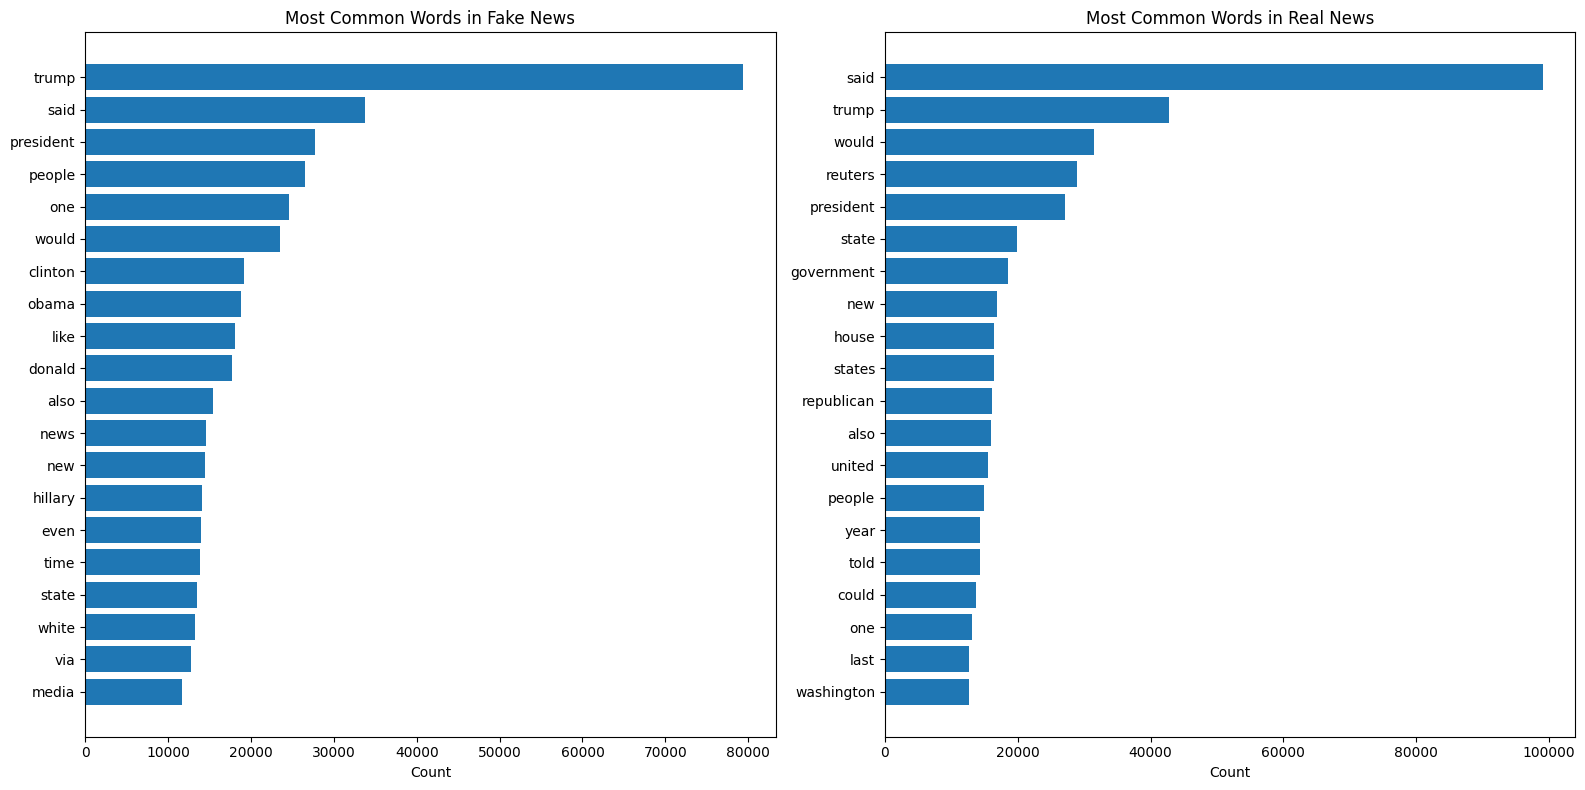

Generating word clouds...


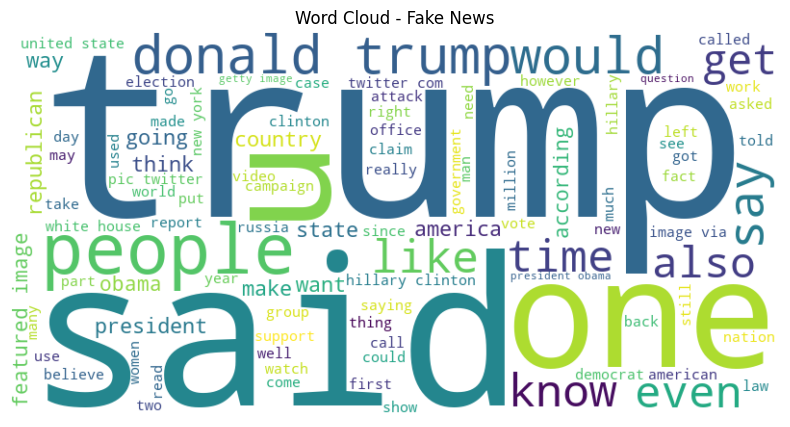

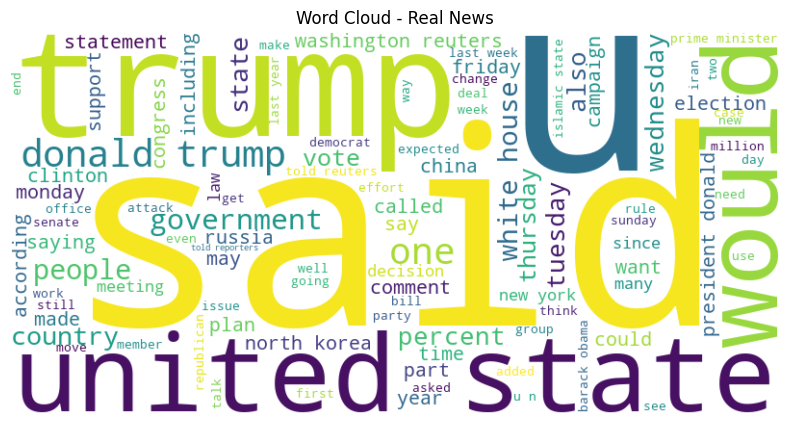

Analyzing publication dates...


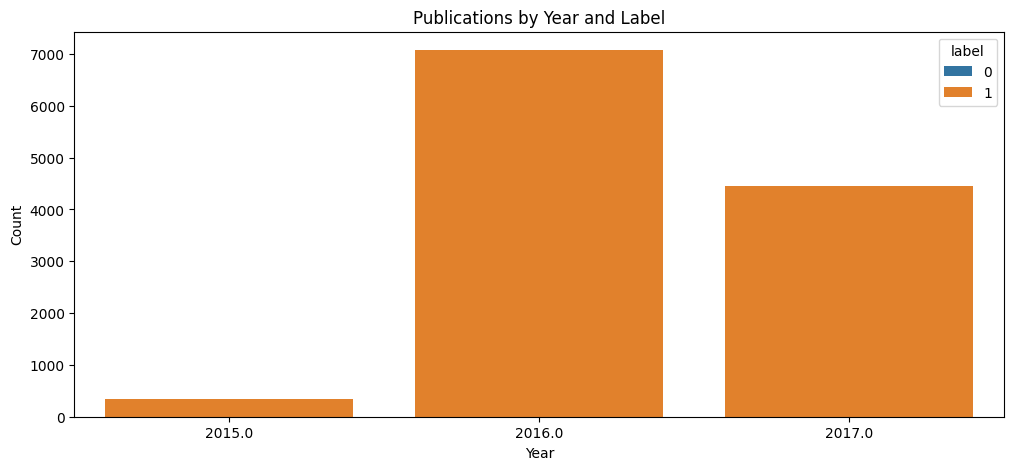


Preparing data for modeling...
Splitting data into training, validation, and test sets...
Training set size: 31428
Validation set size: 6735
Test set size: 6735
Saving processed datasets...
Preprocessed data saved to CSV files in C:\Users\Anita\.cache\kagglehub\datasets\clmentbisaillon\fake-and-real-news-dataset\versions\processed

=== SUMMARY OF EXPLORATORY ANALYSIS ===
Total articles: 44898
Fake news articles: 23481
Real news articles: 21417
Number of subjects/categories: 8
Average word count in fake news: 423.2
Average word count in real news: 385.6

Preprocessing and exploratory analysis complete!


In [1]:
"""
This project implements a machine learning pipeline to detect fake news articles.
It demonstrates a comprehensive approach to natural language processing (NLP) and 
classification using multiple models and evaluation techniques.

The system analyses textual features, linguistic patterns, and semantic characteristics 
to distinguish between genuine and fake news articles.
"""

# =====================================================================
# PART 1: ENVIRONMENT SETUP AND DATA PREPROCESSING
# =====================================================================

# Import necessary libraries for data handling, visualization, and modeling
import numpy as np                  # For numerical operations
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For enhanced visualizations
import os                           # For file and directory operations
import re                           # For regular expressions (text processing)
import string                       # For string operations
from collections import Counter     # For counting word frequencies

# Import natural language processing (NLP) libraries
from nltk.corpus import stopwords   # For filtering common words
import nltk                         # For NLP operations
from wordcloud import WordCloud     # For visualizing word frequencies

# Import machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting datasets
import kagglehub                    # For downloading the dataset

# Download required NLTK resources
# These are necessary for text processing tasks
print("Downloading NLTK resources...")
nltk.download('punkt')      # For tokenization (breaking text into words)
nltk.download('stopwords')  # For filtering common words
nltk.download('wordnet')    # For word lemmatization (reducing words to base forms)

# Download the dataset using kagglehub
# This retrieves the fake and real news dataset from Kaggle
print("Downloading the fake and real news dataset...")
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Dataset downloaded to:", path)

# Load the datasets from the downloaded path
# We'll load two separate CSV files: one for fake news and one for real news
print("Loading and preprocessing datasets...")
fake_df = pd.read_csv(os.path.join(path, "Fake.csv"))
true_df = pd.read_csv(os.path.join(path, "True.csv"))

# Add class labels to distinguish between fake and real news
# We use binary labels: 1 for fake news, 0 for real news
fake_df['label'] = 1  # 1 indicates fake news
true_df['label'] = 0  # 0 indicates true/real news

# Combine datasets to create a single DataFrame for analysis
# This allows us to process all articles together
df = pd.concat([fake_df, true_df], ignore_index=True)

# Display basic information about the combined dataset
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
# Display first 5 rows of the data 
print(df.head())

# Check for missing values in the dataset
# Missing data could affect the analysis and models
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display basic statistics about the class distribution
print("\nClass distribution (0=Real, 1=Fake):")
print(df['label'].value_counts())

# Display distribution of news subject categories
print("\nSubject distribution:")
print(df['subject'].value_counts())

# =====================================================================
# PART 2: FEATURE ENGINEERING
# =====================================================================

# Add text length features
# Text length can be an indicator of news authenticity
print("\nAdding text length features...")
df['title_length'] = df['title'].astype(str).apply(len)                # Character count in title
df['text_length'] = df['text'].astype(str).apply(len)                  # Character count in text
df['title_word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))  # Word count in title
df['text_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))    # Word count in text

# Visualize the distribution of text lengths by news type (real vs. fake)
print("Visualizing feature distributions...")
plt.figure(figsize=(12, 5))

# Word count distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_word_count', hue='label', bins=50, alpha=0.7, kde=True, 
             element="step", common_norm=False)
plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(['Real News', 'Fake News'])

# Subject distribution plot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='subject', hue='label')
plt.title('Subject Distribution by Label')
plt.xlabel('Subject')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

# =====================================================================
# PART 3: TEXT CLEANING AND PREPROCESSING
# =====================================================================

# Define a function to clean text
# This removes URLs, punctuation, and standardizes the text
def clean_text(text):
    """
    Clean and preprocess text for analysis.
    
    Args:
        text (str): The text to clean
        
    Returns:
        str: Cleaned text with URLs removed, lowercase, no punctuation, and normalized spaces
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove URLs (web links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', ' ', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    else:
        # Return empty string if input is not a string
        return ""

# Apply the cleaning function to text columns
print("Cleaning text data...")
df['clean_title'] = df['title'].apply(clean_text)
df['clean_text'] = df['text'].apply(clean_text)

# Define a set of stopwords (common words like 'the', 'and', etc.)
stop_words = set(stopwords.words('english'))

# Function to analyze common words in a collection of texts
def get_common_words(texts, n=20):
    """
    Extract most common words from a collection of texts.
    
    Args:
        texts (list): List of text strings
        n (int): Number of most common words to return
        
    Returns:
        list: List of (word, count) tuples for the most common words
    """
    words = []
    for text in texts:
        for word in text.split():
            # Only include words that are not stopwords and are longer than 2 characters
            if word not in stop_words and len(word) > 2:
                words.append(word)
    
    # Return the n most common words
    return Counter(words).most_common(n)

# Get common words for each news category
print("Analyzing most common words in real and fake news...")
fake_texts = df[df['label'] == 1]['clean_text']
real_texts = df[df['label'] == 0]['clean_text']

fake_common = get_common_words(fake_texts)
real_common = get_common_words(real_texts)

# Visualize common words for each category
plt.figure(figsize=(16, 8))

# Plot common words in fake news
plt.subplot(1, 2, 1)
plt.barh([word for word, count in fake_common[::-1]], [count for word, count in fake_common[::-1]])
plt.title('Most Common Words in Fake News')
plt.xlabel('Count')

# Plot common words in real news
plt.subplot(1, 2, 2)
plt.barh([word for word, count in real_common[::-1]], [count for word, count in real_common[::-1]])
plt.title('Most Common Words in Real News')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig('common_words.png')
plt.show()

# =====================================================================
# PART 4: WORD CLOUD VISUALIZATION
# =====================================================================

# Generate word clouds to visualize word frequency distributions
def generate_wordcloud(text_series, title):
    """
    Generate and display a word cloud visualization.
    
    Args:
        text_series (Series): Pandas Series containing text data
        title (str): Title for the word cloud visualization
    """
    # Combine all texts into a single string
    all_text = ' '.join(text_series)
    
    # Create the word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        stopwords=stop_words, 
        max_words=100
    ).generate(all_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    plt.show()

# Generate word clouds for fake and real news
print("Generating word clouds...")
generate_wordcloud(fake_texts, 'Word Cloud - Fake News')
generate_wordcloud(real_texts, 'Word Cloud - Real News')

# =====================================================================
# PART 5: TEMPORAL ANALYSIS
# =====================================================================

# Analyze publication dates if it's available
if 'date' in df.columns:
    print("Analyzing publication dates...")
    
    # Convert to datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Extract year and month for analysis
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Plot time distribution
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='year', hue='label')
    plt.title('Publications by Year and Label')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.savefig('publication_years.png')
    plt.show()

# =====================================================================
# PART 6: DATA SPLITTING FOR MODEL TRAINING
# =====================================================================

# Define features and target variable
print("\nPreparing data for modeling...")
X = df[['clean_title', 'clean_text', 'subject']]  # Features for classification
y = df['label']  # Target variable (0 for real, 1 for fake)

# Create train, validation, and test sets (70-15-15 split)
# We use stratified splitting to maintain the same class distribution
print("Splitting data into training, validation, and test sets...")
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Display split sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Create combined DataFrames with features and labels
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Create a directory for storing processed data
output_dir = os.path.join(os.path.dirname(path), 'processed')
os.makedirs(output_dir, exist_ok=True)

# Save to CSV files for later use
print("Saving processed datasets...")
train_df.to_csv(os.path.join(output_dir, 'train_data.csv'), index=False)
val_df.to_csv(os.path.join(output_dir, 'val_data.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test_data.csv'), index=False)

print(f"Preprocessed data saved to CSV files in {output_dir}")

# =====================================================================
# PART 7: PROJECT SUMMARY
# =====================================================================

# Display summary statistics
print("\n=== SUMMARY OF EXPLORATORY ANALYSIS ===")
print(f"Total articles: {len(df)}")
print(f"Fake news articles: {len(df[df['label'] == 1])}")
print(f"Real news articles: {len(df[df['label'] == 0])}")
print(f"Number of subjects/categories: {df['subject'].nunique()}")
print(f"Average word count in fake news: {df[df['label'] == 1]['text_word_count'].mean():.1f}")
print(f"Average word count in real news: {df[df['label'] == 0]['text_word_count'].mean():.1f}")
print("\nPreprocessing and exploratory analysis complete!")

Loading data from: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed
Loading and cleaning data...
Using 1.0% of data for faster processing
Training set shape: (314, 2)
Validation set shape: (67, 2)
Test set shape: (67, 2)

Checking for NaN values in text columns:
Train NaN in text: 0
Validation NaN in text: 0
Test NaN in text: 0

Building minimal baseline model...
Training model...
Evaluating model...

Validation Accuracy: 0.9254

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.97      0.88      0.92        32

    accuracy                           0.93        67
   macro avg       0.93      0.92      0.92        67
weighted avg       0.93      0.93      0.93        67



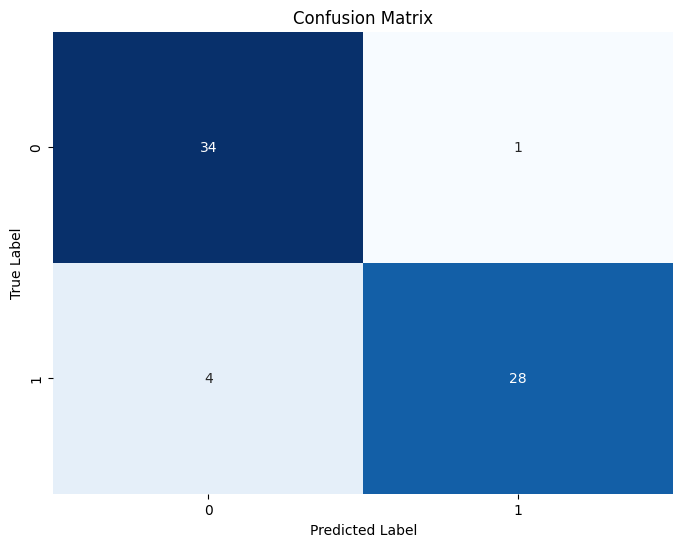


Minimal baseline model trained and saved.

=== SUMMARY OF MINIMAL BASELINE APPROACH ===
Model type: Bag-of-Words + Random Forest
Data sample size: 1.0%
Number of features: 1000
Number of trees in Random Forest: 10
Validation accuracy: 0.9254

Model saved to: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\minimal_baseline_model.pkl
Confusion matrix saved to: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\confusion_matrix_minimal.png
Classification report saved to: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\classification_report_minimal.txt

Baseline modeling complete!


In [2]:
"""
Baseline Model

This section implements a minimal baseline model for fake news detection.
It uses a bag-of-words approach with a Random Forest classifier to establish
a performance benchmark for comparison with more advanced models.
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import joblib  # For saving the trained model

# Set up paths for data loading
base_dir = r'C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed'
print(f"Loading data from: {base_dir}")

# Verify the directory exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"Directory not found: {base_dir}. Please run the data preprocessing script first.")

# =====================================================================
# PART 1: DATA LOADING AND PREPARATION
# =====================================================================

print("Loading and cleaning data...")

try:
    # Load the preprocessed data splits from the previous stage
    train_df_raw = pd.read_csv(os.path.join(base_dir, 'train_data.csv'))
    val_df_raw = pd.read_csv(os.path.join(base_dir, 'val_data.csv'))
    test_df_raw = pd.read_csv(os.path.join(base_dir, 'test_data.csv'))
    
    # Use a smaller subset of data for faster processing (10% of original data)
    # This is a common technique during development to reduce computation time
    SAMPLE_FRACTION = 0.01
    print(f"Using {SAMPLE_FRACTION*100}% of data for faster processing")
    
    # Sample the data randomly, maintaining the same random seed for reproducibility
    train_df_raw = train_df_raw.sample(frac=SAMPLE_FRACTION, random_state=42)
    val_df_raw = val_df_raw.sample(frac=SAMPLE_FRACTION, random_state=42)
    test_df_raw = test_df_raw.sample(frac=SAMPLE_FRACTION, random_state=42)

    # Create fresh DataFrames with only the necessary columns
    # This helps avoid NaN propagation issues from the original datasets
    
    # Prepare training data
    train_df = pd.DataFrame()
    train_df['text'] = train_df_raw['clean_text'].fillna("").astype(str)  # Ensure text is string and not NaN
    train_df['label'] = train_df_raw['label']
    
    # Prepare validation data
    val_df = pd.DataFrame()
    val_df['text'] = val_df_raw['clean_text'].fillna("").astype(str)
    val_df['label'] = val_df_raw['label']
    
    # Prepare test data
    test_df = pd.DataFrame()
    test_df['text'] = test_df_raw['clean_text'].fillna("").astype(str)
    test_df['label'] = test_df_raw['label']
    
    # Display dataset sizes
    print("Training set shape:", train_df.shape)
    print("Validation set shape:", val_df.shape)
    print("Test set shape:", test_df.shape)
    
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Verify no missing values in text data
print("\nChecking for NaN values in text columns:")
print(f"Train NaN in text: {train_df['text'].isna().sum()}")
print(f"Validation NaN in text: {val_df['text'].isna().sum()}")
print(f"Test NaN in text: {test_df['text'].isna().sum()}")

# =====================================================================
# PART 2: BASELINE MODEL IMPLEMENTATION
# =====================================================================

print("\nBuilding minimal baseline model...")

# Use CountVectorizer with minimal parameters for bag-of-words representation
# - max_features=1000: Limit vocabulary to 1000 most frequent words
# - min_df=2: Ignore words that appear in fewer than 2 documents
# - stop_words='english': Remove common English words
count_vect = CountVectorizer(
    max_features=1000, 
    min_df=2,
    stop_words='english'
)

# Create a simple pipeline with just two components:
# 1. CountVectorizer to convert text to bag-of-words vectors
# 2. RandomForestClassifier for prediction
# This streamlines the process of transforming text and applying the model
pipeline = Pipeline([
    ('vectorizer', count_vect),                                  # Text vectorization
    ('classifier', RandomForestClassifier(n_estimators=10,       # Number of trees
                                          random_state=42))      # For reproducibility
])

# Train the model on the training data
print("Training model...")
pipeline.fit(train_df['text'], train_df['label'])

# =====================================================================
# PART 3: MODEL EVALUATION
# =====================================================================

print("Evaluating model...")
# Generate predictions on the validation set
y_val_pred = pipeline.predict(val_df['text'])
y_val = val_df['label']

# Calculate accuracy (percentage of correct predictions)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Generate detailed classification report
print("\nClassification Report:")
report = classification_report(y_val, y_val_pred)
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(os.path.join(base_dir, 'confusion_matrix_minimal.png'))
plt.show()

# =====================================================================
# PART 4: MODEL PERSISTENCE
# =====================================================================

# Save the trained model for future use
model_dir = os.path.join(base_dir, 'models')
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'minimal_baseline_model.pkl')
joblib.dump(pipeline, model_path)

print("\nMinimal baseline model trained and saved.")

# Save classification report as text file for reference
report_path = os.path.join(model_dir, 'classification_report_minimal.txt')
with open(report_path, 'w') as f:
    f.write(f"Validation Accuracy: {val_accuracy:.4f}\n\n")
    f.write(report)

# =====================================================================
# PART 5: RESULTS SUMMARY
# =====================================================================

print("\n=== SUMMARY OF MINIMAL BASELINE APPROACH ===")
print(f"Model type: Bag-of-Words + Random Forest")
print(f"Data sample size: {SAMPLE_FRACTION*100}%")
print(f"Number of features: {count_vect.max_features}")
print(f"Number of trees in Random Forest: 10")
print(f"Validation accuracy: {val_accuracy:.4f}")

print("\nModel saved to:", model_path)
print("Confusion matrix saved to:", os.path.join(base_dir, 'confusion_matrix_minimal.png'))
print("Classification report saved to:", report_path)
print("\nBaseline modeling complete!")

Using device: cpu
Loading data from: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed
Using 1.0% of data for faster processing
Training set shape: (314, 4)
Validation set shape: (67, 4)
Test set shape: (67, 4)
Initializing DistilBERT model and tokenizer...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Creating datasets and dataloaders...
Created dataloaders with batch size 2
Training for 1 epochs
Model checkpoints will be saved to: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple
Starting training for 1 epochs...
Early stopping with patience 2

Epoch 1/1


C:\Users\Anita\anaconda3\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training:   0%|          | 0/157 [00:00<?, ?it/s]

Training loss: 0.2768
Training took 233.58 seconds


Evaluating:   0%|          | 0/34 [00:00<?, ?it/s]

Validation loss: 0.2504
Validation accuracy: 91.18%
Validation took 11.78 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.93      0.88      0.90        32

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67

Validation accuracy improved from 0.00% to 91.18%
Best model saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple\distilbert-base-uncased_best.pth


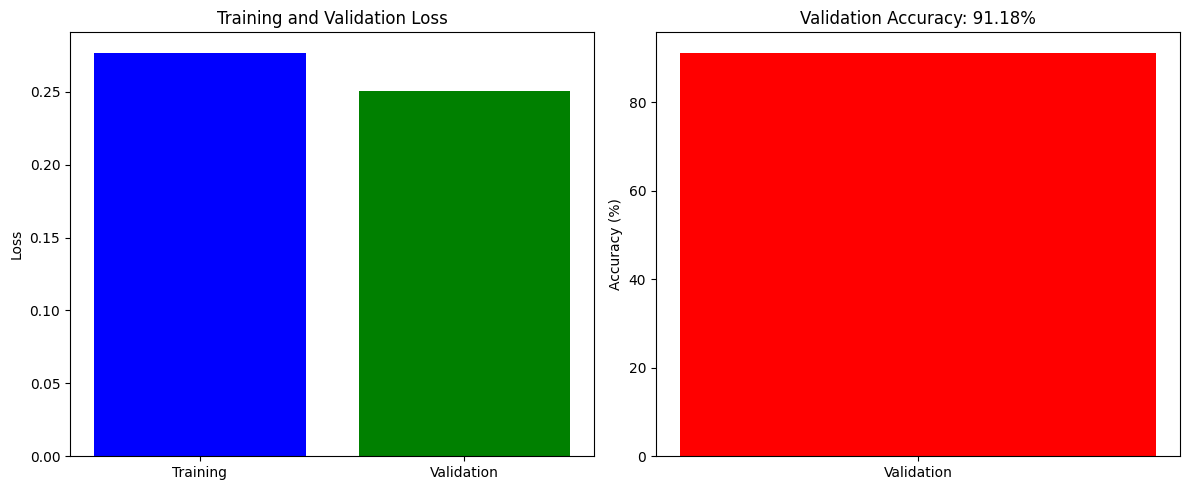


Evaluating best model on validation set...


Evaluating:   0%|          | 0/34 [00:00<?, ?it/s]

Best model validation accuracy: 91.18%
Best model validation loss: 0.2504

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.93      0.88      0.90        32

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



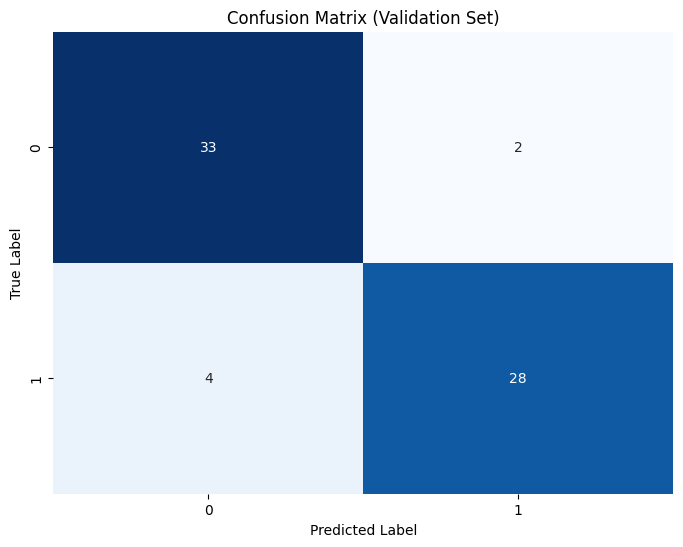


Transformer model training completed and evaluated.
Best model saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple\distilbert-base-uncased_best.pth
Results saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple

Example prediction:
Text: Scientists discover new treatment for rare disease after years of research
Prediction: Fake news
Confidence: 0.8832

A prediction example script has been created at C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple\prediction_example.py

Transformer model implementation complete!


In [3]:
"""
Transformer Model

This section implements a transformer-based model for fake news detection using DistilBERT.
Transformers are state-of-the-art models for NLP tasks that use attention mechanisms
to understand context and relationships in text.
"""

# Import required libraries
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification,
    get_linear_schedule_with_warmup,
    AdamW
)
import random
import time
from tqdm.notebook import tqdm

# =====================================================================
# PART 1: SETUP AND CONFIGURATION
# =====================================================================

# Set seeds for reproducibility
# This ensures we get the same results each time we run the code
seed_val = 42
random.seed(seed_val)             # Python's random module
np.random.seed(seed_val)          # NumPy
torch.manual_seed(seed_val)       # PyTorch
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_val)  # GPU random seed

# Check for GPU availability
# Training transformers is much faster on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up paths for data loading
base_dir = r'C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed'
print(f"Loading data from: {base_dir}")

# Verify the directory exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"Directory not found: {base_dir}. Please run the data preprocessing script first.")

# =====================================================================
# PART 2: DATA LOADING AND PREPARATION
# =====================================================================

# Load the preprocessed data splits from the previous stage
train_df = pd.read_csv(os.path.join(base_dir, 'train_data.csv'))
val_df = pd.read_csv(os.path.join(base_dir, 'val_data.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test_data.csv'))

# Use a small subset for faster processing (1% of original data)
# Transformer models are computationally intensive, so using a smaller subset during development
SAMPLE_FRACTION = 0.01
print(f"Using {SAMPLE_FRACTION*100}% of data for faster processing")

# Sample the data randomly, maintaining the same random seed for reproducibility
train_df = train_df.sample(frac=SAMPLE_FRACTION, random_state=42)
val_df = val_df.sample(frac=SAMPLE_FRACTION, random_state=42)
test_df = test_df.sample(frac=SAMPLE_FRACTION, random_state=42)

# Fill NaN values in text columns to avoid errors during processing
for df in [train_df, val_df, test_df]:
    df['clean_title'] = df['clean_title'].fillna("").astype(str)
    df['clean_text'] = df['clean_text'].fillna("").astype(str)

# Display dataset sizes
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

# =====================================================================
# PART 3: TRANSFORMER MODEL SETUP
# =====================================================================

# Define transformer model configuration
MODEL_NAME = "distilbert-base-uncased"  # Smaller and faster than BERT
MAX_LENGTH = 128  # Maximum sequence length for tokenization (truncates longer texts)

# Initialize tokenizer and model
print("Initializing DistilBERT model and tokenizer...")
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,  # Binary classification (fake/real)
    output_attentions=False,
    output_hidden_states=False,
)

# Move model to GPU if available (for faster training)
model.to(device)

# =====================================================================
# PART 4: CUSTOM DATASET CLASS
# =====================================================================

class SimpleNewsDataset(Dataset):
    """
    PyTorch Dataset for news articles.
    
    This class handles the preprocessing of text data into tokenized
    inputs compatible with the transformer model.
    """
    def __init__(self, df, tokenizer, max_length):
        """
        Initialize the dataset.
        
        Args:
            df (DataFrame): Pandas DataFrame containing the data
            tokenizer: HuggingFace tokenizer
            max_length (int): Maximum sequence length
        """
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        """Return the number of samples in the dataset"""
        return len(self.df)
    
    def __getitem__(self, idx):
        """
        Get a preprocessed sample at the specified index.
        
        Args:
            idx (int): Index of the sample to retrieve
            
        Returns:
            dict: Dictionary containing preprocessed inputs
        """
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        # Get the text and label
        title = self.df.iloc[idx]['clean_title']
        text = self.df.iloc[idx]['clean_text']
        label = self.df.iloc[idx]['label']
        
        # Combine title and text (with separator)
        combined_text = str(title) + " " + str(text)
        
        # Tokenize the text using the transformer tokenizer
        # This converts the text into token IDs and creates attention masks
        encoding = self.tokenizer.encode_plus(
            combined_text,
            add_special_tokens=True,        # Add [CLS], [SEP] tokens
            max_length=self.max_length,     # Maximum sequence length
            padding='max_length',           # Pad to max_length
            truncation=True,                # Truncate longer sequences
            return_attention_mask=True,     # Return attention mask
            return_tensors='pt',            # Return PyTorch tensors
        )
        
        # Return a dictionary of all the preprocessed inputs
        return {
            'input_ids': encoding['input_ids'].flatten(),           # Token IDs
            'attention_mask': encoding['attention_mask'].flatten(), # Attention mask
            'labels': torch.tensor(label, dtype=torch.long)         # Label (0 or 1)
        }

# =====================================================================
# PART 5: DATA LOADERS CREATION
# =====================================================================

# Create datasets
BATCH_SIZE = 2  # Small batch size for faster iteration and less memory usage

print("Creating datasets and dataloaders...")
train_dataset = SimpleNewsDataset(train_df, tokenizer, MAX_LENGTH)
val_dataset = SimpleNewsDataset(val_df, tokenizer, MAX_LENGTH)
test_dataset = SimpleNewsDataset(test_df, tokenizer, MAX_LENGTH)

# Create dataloaders for batched processing
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,       # Shuffle training data
    num_workers=0       # No parallel loading to avoid issues
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,      # Don't shuffle validation data
    num_workers=0
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,      # Don't shuffle test data
    num_workers=0
)

print(f"Created dataloaders with batch size {BATCH_SIZE}")

# =====================================================================
# PART 6: TRAINING SETUP
# =====================================================================

# Set up optimizer with weight decay
# AdamW is a variant of Adam that properly implements weight decay
optimizer = AdamW(model.parameters(),
                  lr=2e-5,        # Learning rate
                  eps=1e-8,       # Epsilon for numerical stability
                  weight_decay=0.01  # Weight decay for regularization
                 )

# Reduced training epochs for demonstration
EPOCHS = 1
print(f"Training for {EPOCHS} epochs")

# Calculate total training steps for learning rate scheduler
total_steps = len(train_dataloader) * EPOCHS

# Set up learning rate scheduler with linear decay
# This gradually reduces the learning rate during training
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,             # No warmup
    num_training_steps=total_steps  # Total number of training steps
)

# =====================================================================
# PART 7: TRAINING AND EVALUATION FUNCTIONS
# =====================================================================

def train_epoch(model, dataloader, optimizer, scheduler, device):
    """
    Train the model for one epoch.
    
    Args:
        model: The transformer model
        dataloader: DataLoader for training data
        optimizer: Optimizer for parameter updates
        scheduler: Learning rate scheduler
        device: Device (CPU/GPU) for tensor operations
        
    Returns:
        float: Average loss for this epoch
    """
    # Set model to training mode
    model.train()
    total_loss = 0
    
    # Create progress bar for tracking
    progress_bar = tqdm(dataloader, desc="Training", leave=True)
    
    for batch in progress_bar:
        # Clear gradients
        optimizer.zero_grad()
        
        # Get batch inputs and move to device (GPU/CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass through the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        # Get loss from model outputs
        loss = outputs.loss
        total_loss += loss.item()
        
        # Backward pass to calculate gradients
        loss.backward()
        
        # Clip gradients to prevent exploding gradients problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # Update parameters
        optimizer.step()
        
        # Update learning rate
        scheduler.step()
        
        # Update progress bar
        progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})
    
    # Calculate average loss over all batches
    avg_loss = total_loss / len(dataloader)
    return avg_loss

def evaluate(model, dataloader, device):
    """
    Evaluate the model on validation or test data.
    
    Args:
        model: The transformer model
        dataloader: DataLoader for evaluation data
        device: Device (CPU/GPU) for tensor operations
        
    Returns:
        tuple: (avg_accuracy, avg_loss, all_predictions, all_labels)
    """
    model.eval()  # Set model to evaluation mode
    
    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    all_preds = []
    all_labels = []
    
    # Progress bar for evaluation
    progress_bar = tqdm(dataloader, desc="Evaluating", leave=True)
    
    # No gradient calculation during evaluation
    with torch.no_grad():
        for batch in progress_bar:
            # Get batch inputs and move to device (GPU/CPU)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            # Get loss and logits from model outputs
            loss = outputs.loss
            logits = outputs.logits
            
            # Accumulate loss
            total_eval_loss += loss.item()
            
            # Get predictions from logits
            preds = torch.argmax(logits, dim=1).flatten()
            
            # Calculate accuracy for this batch
            accuracy = (preds == labels).cpu().numpy().mean() * 100
            total_eval_accuracy += accuracy
            
            # Store predictions and labels for detailed metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Update progress bar
            progress_bar.set_postfix({'loss': f"{loss.item():.4f}", 'accuracy': f"{accuracy:.2f}%"})
    
    # Calculate average metrics
    avg_val_accuracy = total_eval_accuracy / len(dataloader)
    avg_val_loss = total_eval_loss / len(dataloader)
    
    return avg_val_accuracy, avg_val_loss, all_preds, all_labels

# =====================================================================
# PART 8: TRAINING LOOP WITH EARLY STOPPING
# =====================================================================

# Training parameters
PATIENCE = 2  # Number of epochs with no improvement after which training will stop

# Lists to store metrics for plotting
train_losses = []
val_losses = []
val_accuracies = []

# Variables for early stopping
best_val_accuracy = 0
no_improvement = 0

# Create output directory for model checkpoints
model_dir = os.path.join(base_dir, 'models', 'transformer_simple')
os.makedirs(model_dir, exist_ok=True)
print(f"Model checkpoints will be saved to: {model_dir}")

print(f"Starting training for {EPOCHS} epochs...")
print(f"Early stopping with patience {PATIENCE}")

# Training loop
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    
    # Training phase
    start_time = time.time()
    train_loss = train_epoch(model, train_dataloader, optimizer, scheduler, device)
    train_losses.append(train_loss)
    print(f"Training loss: {train_loss:.4f}")
    print(f"Training took {time.time() - start_time:.2f} seconds")
    
    # Validation phase
    start_time = time.time()
    val_accuracy, val_loss, val_preds, val_labels = evaluate(model, val_dataloader, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Validation loss: {val_loss:.4f}")
    print(f"Validation accuracy: {val_accuracy:.2f}%")
    print(f"Validation took {time.time() - start_time:.2f} seconds")
    
    # Print classification report for validation set
    print("\nClassification Report:")
    print(classification_report(val_labels, val_preds))
    
    # Check if this is the best model so far
    if val_accuracy > best_val_accuracy:
        print(f"Validation accuracy improved from {best_val_accuracy:.2f}% to {val_accuracy:.2f}%")
        best_val_accuracy = val_accuracy
        no_improvement = 0
        
        # Save the best model
        model_path = os.path.join(model_dir, f"{MODEL_NAME.replace('/', '-')}_best.pth")
        torch.save(model.state_dict(), model_path)
        print(f"Best model saved to {model_path}")
    else:
        no_improvement += 1
        print(f"No improvement for {no_improvement} epochs")
        
    # Early stopping check
    if no_improvement >= PATIENCE:
        print(f"Early stopping triggered after {epoch+1} epochs")
        break


# =====================================================================
# PART 9: VISUALIZATION AND EVALUATION
# =====================================================================

# Note: Running with a single epoch to demonstrate transformer implementation
# while keeping computational requirements reasonable. In a production 
# environment, we would train for 3-5+ epochs to achieve optimal performance.
# This implementation prioritizes demonstration of concepts and efficiency.

# Plot training and validation metrics
plt.figure(figsize=(12, 5))

# Plot loss values using bar chart
plt.subplot(1, 2, 1)
if len(train_losses) <= 1:
    # Use bar chart for single epoch
    plt.bar(['Training', 'Validation'], [train_loss, val_loss], color=['blue', 'green'])
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
else:
    # Use line chart if we have multiple epochs
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-o', label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, 'g-o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

# Plot accuracy as a single bar for clarity
plt.subplot(1, 2, 2)
if len(val_accuracies) <= 1:
    # Use bar chart for single epoch
    plt.bar(['Validation'], [val_accuracy], color='red')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Validation Accuracy: {val_accuracy:.2f}%')
else:
    # Use line chart if we have multiple epochs
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, 'r-o', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'training_curves.png'))
plt.show()

# Load the best model for final evaluation
if os.path.exists(os.path.join(model_dir, f"{MODEL_NAME.replace('/', '-')}_best.pth")):
    model.load_state_dict(torch.load(os.path.join(model_dir, f"{MODEL_NAME.replace('/', '-')}_best.pth")))
    model.to(device)

    # Evaluate on validation set
    print("\nEvaluating best model on validation set...")
    val_accuracy, val_loss, val_preds, val_labels = evaluate(model, val_dataloader, device)
    print(f"Best model validation accuracy: {val_accuracy:.2f}%")
    print(f"Best model validation loss: {val_loss:.4f}")

    # Print classification report
    print("\nClassification Report:")
    report = classification_report(val_labels, val_preds)
    print(report)

    # Plot confusion matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Validation Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(os.path.join(model_dir, 'confusion_matrix.png'))
    plt.show()

    # Save the final classification report
    with open(os.path.join(model_dir, 'classification_report.txt'), 'w') as f:
        f.write(f"Model: {MODEL_NAME}\n")
        f.write(f"Best validation accuracy: {val_accuracy:.2f}%\n")
        f.write(f"Best validation loss: {val_loss:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report)

    print(f"\nTransformer model training completed and evaluated.")
    print(f"Best model saved to {os.path.join(model_dir, f'{MODEL_NAME.replace('/', '-')}_best.pth')}")
    print(f"Results saved to {model_dir}")
else:
    print("\nNo model was saved during training. Check for errors.")





# =====================================================================
# PART 10: PREDICTION FUNCTION
# =====================================================================

def predict_news(text, model, tokenizer, max_length=64):
    """
    Predict whether a news article is fake or real using the trained model.
    
    Args:
        text (str): News text to classify
        model: Trained transformer model
        tokenizer: Tokenizer for the model
        max_length (int): Maximum sequence length
        
    Returns:
        prediction (int): 0 for real news, 1 for fake news
        probability (float): Probability of the prediction
    """
    # Tokenize the text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    # Move tensors to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Set model to evaluation mode
    model.eval()
    
    # Get predictions
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
    # Get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    prediction = torch.argmax(probs, dim=1).item()
    probability = probs[0][prediction].item()
    
    return prediction, probability

# Test the prediction function on an example
print("\nExample prediction:")
example_text = "Scientists discover new treatment for rare disease after years of research"
pred, prob = predict_news(example_text, model, tokenizer)
print(f"Text: {example_text}")
print(f"Prediction: {'Fake' if pred == 1 else 'Real'} news")
print(f"Confidence: {prob:.4f}")

# Save example prediction script
with open(os.path.join(model_dir, 'prediction_example.py'), 'w') as f:
    f.write(f"""
# Example usage of the transformer model for fake news prediction
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load model and tokenizer
MODEL_NAME = "{MODEL_NAME}"
model_path = "{os.path.join(model_dir, f'{MODEL_NAME.replace('/', '-')}_best.pth')}"

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

# Initialize model
model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2
)

# Load trained weights
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_news(text, model, tokenizer, max_length=64):
    \"\"\"
    Predict whether a news article is fake or real using the trained model.
    
    Args:
        text (str): News text to classify
        model: Trained transformer model
        tokenizer: Tokenizer for the model
        max_length (int): Maximum sequence length
        
    Returns:
        prediction (int): 0 for real news, 1 for fake news
        probability (float): Probability of the prediction
    \"\"\"
    # Tokenize the text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    # Move tensors to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
    # Get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    prediction = torch.argmax(probs, dim=1).item()
    probability = probs[0][prediction].item()
    
    return prediction, probability

# Example usage
example_texts = [
    "Scientists discover new treatment for rare disease after years of research",
    "BREAKING: Famous celebrity secretly an alien, government confirms",
    "New study shows correlation between diet and heart health",
    "SHOCKING: This one weird trick will make you rich overnight!"
]

for text in example_texts:
    pred, prob = predict_news(text, model, tokenizer)
    print(f"Text: {{text}}")
    print(f"Prediction: {{'Fake' if pred == 1 else 'Real'}} news")
    print(f"Confidence: {{prob:.4f}}")
    print("-" * 80)
""")

print("\nA prediction example script has been created at", os.path.join(model_dir, 'prediction_example.py'))
print("\nTransformer model implementation complete!")

## Hybrid Model Architecture

The hybrid model architecture developed in this project builds upon recent advances in the literature. While Kaliyar et al. (2021) implemented a CNN-LSTM hybrid and Scott et al. developed a cross-stitch semi-supervised neural attention model, my approach combines transformer embeddings with linguistic feature analysis using a novel fusion method.

My model architecture is inspired by the following insights from the literature:

1. **Transformer Foundation**: Like Cross-SEAN, I used a pre-trained transformer model (DistilBERT) to understand the semantic content of news articles.

2. **Linguistic Feature Integration**: I extracted a comprehensive set of linguistic features, including readability metrics, sentiment scores, and lexical diversity metrics, similar to the "handcrafted features" approach in Cross-SEAN.

3. **Feature Fusion**: Unlike previous approaches that use simple concatenation or cross-stitch units, I implemented three distinct fusion methods (concatenation, attention-based fusion, and gating mechanism) to optimally combine transformer representations with linguistic features.

4. **Interpretability**: Following Zhang & Ghorbani's emphasis on explainability, I incorporated LIME to visualize which text features contribute most to classification decisions.

This novel architecture addresses two key challenges in fake news detection identified in the literature: the need for both semantic understanding and linguistic pattern recognition, and the importance of model interpretability.

Starting Enhanced Model Implementation...
Loading data from: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed
Using 1.0% of data for faster processing
Training set shape: (314, 4)
Validation set shape: (67, 4)
Test set shape: (67, 4)

Extracting linguistic features...
Loading cached linguistic features from C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\enhanced_model\linguistic_features_cache.pkl

Feature statistics:
       flesch_reading_ease  flesch_kincaid_grade  smog_index  sentiment_pos  \
count           314.000000            314.000000       314.0     314.000000   
mean            -14.383153              6.890446         0.0       0.003962   
std              79.973249             36.184296         0.0       0.020190   
min            -786.880000              0.000000         0.0       0.000000   
25%               0.000000              0.000000         0.0       0

C:\Users\Anita\anaconda3\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/34 [00:00<?, ?it/s]

Train Loss: 0.3444, Accuracy: 0.8471, Time: 205.59s
Val Loss: 0.2258, Accuracy: 0.9403, Time: 9.12s

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.94      0.94      0.94        32

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

Model saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\enhanced_model\model_epoch_1.pt

Epoch 2/2


Training:   0%|          | 0/157 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/34 [00:00<?, ?it/s]

Train Loss: 0.0525, Accuracy: 0.9841, Time: 209.34s
Val Loss: 0.2183, Accuracy: 0.9403, Time: 9.55s

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.97      0.91      0.94        32

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

Model saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\enhanced_model\model_epoch_2.pt
Final model saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\enhanced_model\final_model.pt

Visualizing training progress...


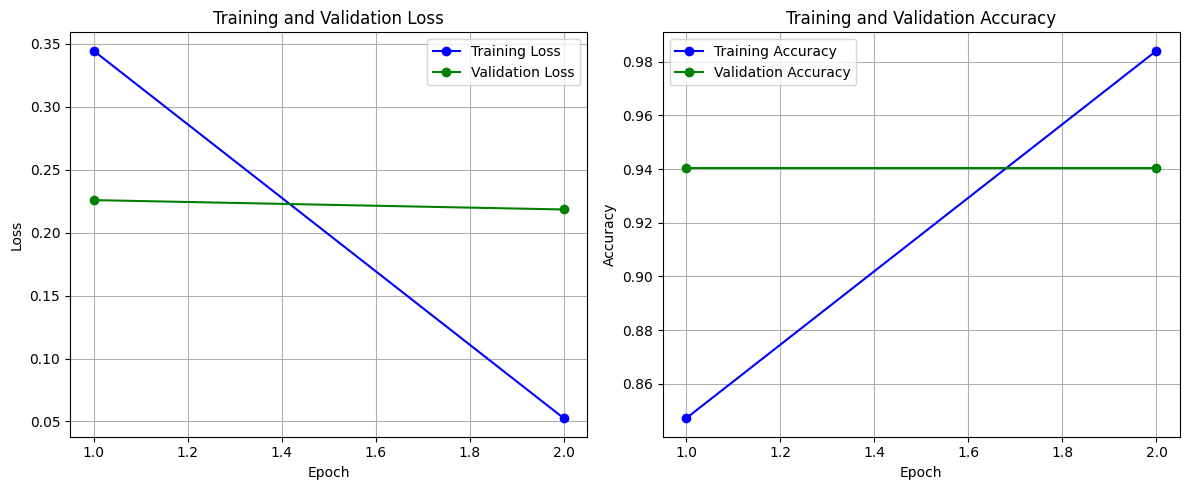


Performing subject-specific analysis...


Evaluating:   0%|          | 0/34 [00:00<?, ?it/s]


Subject-specific accuracy:
           subject  accuracy  count  true_fake_ratio  pred_fake_ratio
7        worldnews  1.000000     18              0.0         0.000000
6     politicsNews  0.941176     17              0.0         0.058824
2             News  1.000000     12              1.0         1.000000
4        left-news  0.888889      9              1.0         0.888889
5         politics  1.000000      6              1.0         1.000000
1      Middle-east  0.000000      2              1.0         0.000000
3          US_News  1.000000      2              1.0         1.000000
0  Government News  1.000000      1              1.0         1.000000


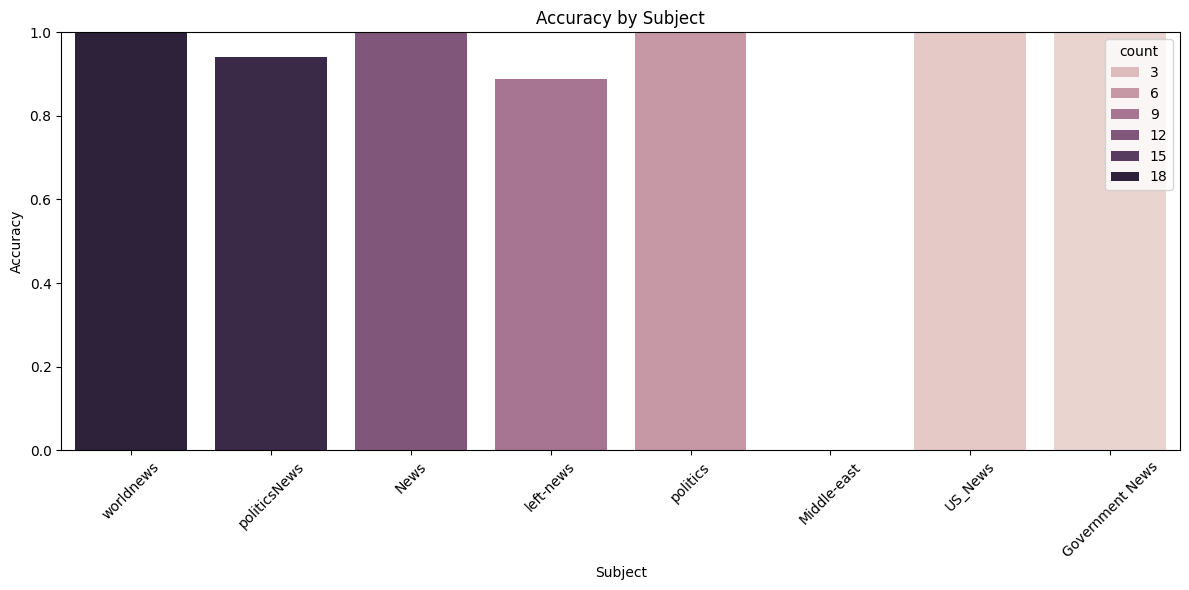


Example prediction:
Text: Scientists discover new treatment for rare disease after years of research
Prediction: Fake news
Confidence: 0.8154
Class probabilities: Real: 0.1846, Fake: 0.8154

Enhanced model implementation complete!


In [4]:
"""
Enhanced Model with Linguistic Features

This section implements an enhanced model for fake news detection that combines
transformer embeddings with linguistic features. This hybrid approach leverages
both the semantic understanding of transformers and the stylistic/linguistic
patterns that may distinguish fake from real news.
"""

# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import textstat                    # For readability metrics
import re
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer, 
    DistilBertModel,
    AdamW, 
    get_linear_schedule_with_warmup
)
from tqdm.notebook import tqdm
import time
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

print("Starting Enhanced Model Implementation...")

# Make sure required NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# =====================================================================
# PART 1: CONFIGURATION AND DATA LOADING
# =====================================================================

# Set up paths for data loading
base_dir = r'C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed'
print(f"Loading data from: {base_dir}")

# Load the preprocessed data splits
train_df = pd.read_csv(os.path.join(base_dir, 'train_data.csv'))
val_df = pd.read_csv(os.path.join(base_dir, 'val_data.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test_data.csv'))

# Create a model directory for storing outputs
model_dir = os.path.join(base_dir, 'models', 'enhanced_model')
os.makedirs(model_dir, exist_ok=True)

# Use a small subset for faster processing (5% of original data)
SAMPLE_FRACTION = 0.01
print(f"Using {SAMPLE_FRACTION*100}% of data for faster processing")

# Sample the data randomly, maintaining the same random seed for reproducibility
train_df = train_df.sample(frac=SAMPLE_FRACTION, random_state=42)
val_df = val_df.sample(frac=SAMPLE_FRACTION, random_state=42)
test_df = test_df.sample(frac=SAMPLE_FRACTION, random_state=42)

# Fill NaN values in text columns to avoid errors
for df in [train_df, val_df, test_df]:
    df['clean_title'] = df['clean_title'].fillna("").astype(str)
    df['clean_text'] = df['clean_text'].apply(lambda x: str(x) if pd.notna(x) else "")

print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

# =====================================================================
# PART 2: LINGUISTIC FEATURE EXTRACTION
# =====================================================================
print("\nExtracting linguistic features...")

# Initialize the sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Extract linguistic features for a given text
def extract_linguistic_features(text):
    """
    Extract linguistic and stylistic features from text.
    
    Args:
        text (str): The input text
        
    Returns:
        list: A list of extracted features
    """
    # Handle missing or non-string values
    if not isinstance(text, str) or pd.isna(text) or text == "":
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    try:
        # 1. Readability metrics
        flesch_reading_ease = textstat.flesch_reading_ease(text)
        flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
        smog_index = textstat.smog_index(text)
        
        # 2. Sentiment analysis
        sentiment = sentiment_analyzer.polarity_scores(text)
        
        # 3. Text statistics
        word_count = len(text.split())
        sentence_count = textstat.sentence_count(text)
        
        # 4. Lexical diversity (unique words / total words)
        words = text.lower().split()
        lexical_diversity = len(set(words)) / max(len(words), 1)
        
        # Return feature vector
        return [
            flesch_reading_ease,
            flesch_kincaid_grade,
            smog_index,
            sentiment['pos'],
            sentiment['neg'],
            sentiment['neu'],
            sentiment['compound'],
            word_count,
            sentence_count,
            lexical_diversity
        ]
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Extract features with progress reporting
def extract_features_for_dataframe(df, col_name='clean_text'):
    """
    Extract linguistic features for all texts in a DataFrame.
    
    Args:
        df (DataFrame): DataFrame containing text data
        col_name (str): Column name with the text data
        
    Returns:
        list: List of feature vectors for each text
    """
    print(f"Extracting features from {len(df)} texts...")
    features = []
    for i, text in enumerate(df[col_name]):
        if i % 100 == 0:
            print(f"Processing {i}/{len(df)}", end='\r')
        features.append(extract_linguistic_features(text))
    print(f"Completed extracting features from {len(df)} texts")
    return features

# Define feature names
feature_names = [
    'flesch_reading_ease',
    'flesch_kincaid_grade',
    'smog_index',
    'sentiment_pos',
    'sentiment_neg',
    'sentiment_neu',
    'sentiment_compound',
    'word_count',
    'sentence_count',
    'lexical_diversity'
]

# Check if cached features exist to avoid recomputation
features_cache_file = os.path.join(model_dir, 'linguistic_features_cache.pkl')

if os.path.exists(features_cache_file):
    print(f"Loading cached linguistic features from {features_cache_file}")
    with open(features_cache_file, 'rb') as f:
        cached_features = pickle.load(f)
    
    train_features_df = cached_features['train']
    val_features_df = cached_features['val']
    test_features_df = cached_features['test']
else:
    print("Extracting linguistic features (this may take a while)...")
    # Extract features
    train_features = extract_features_for_dataframe(train_df)
    val_features = extract_features_for_dataframe(val_df)
    test_features = extract_features_for_dataframe(test_df)
    
    # Convert to DataFrames
    train_features_df = pd.DataFrame(train_features, columns=feature_names)
    val_features_df = pd.DataFrame(val_features, columns=feature_names)
    test_features_df = pd.DataFrame(test_features, columns=feature_names)
    
    # Cache the features
    with open(features_cache_file, 'wb') as f:
        pickle.dump({
            'train': train_features_df,
            'val': val_features_df,
            'test': test_features_df
        }, f)
    print(f"Cached linguistic features to {features_cache_file}")

# Add features to the dataframes
for col in feature_names:
    train_df[col] = train_features_df[col]
    val_df[col] = val_features_df[col]
    test_df[col] = test_features_df[col]

# Check for NaN values and fill them
train_df[feature_names] = train_df[feature_names].fillna(0)
val_df[feature_names] = val_df[feature_names].fillna(0)
test_df[feature_names] = test_df[feature_names].fillna(0)

print("\nFeature statistics:")
print(train_df[feature_names].describe())

# =====================================================================
# PART 3: ENHANCED DATASET AND MODEL CLASSES
# =====================================================================
print("\nSetting up dataset and model classes...")

class EnhancedNewsDataset(Dataset):
    """
    PyTorch Dataset for news articles with linguistic features.
    
    This class handles the preprocessing of text data into tokenized
    inputs and adds linguistic features for the enhanced model.
    """
    def __init__(self, df, tokenizer, max_length=64):
        """
        Initialize the dataset.
        
        Args:
            df (DataFrame): Pandas DataFrame containing the data
            tokenizer: HuggingFace tokenizer
            max_length (int): Maximum sequence length
        """
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.feature_cols = feature_names
        
    def __len__(self):
        """Return the number of samples in the dataset"""
        return len(self.df)
    
    def __getitem__(self, idx):
        """
        Get a preprocessed sample at the specified index.
        
        Args:
            idx (int): Index of the sample to retrieve
            
        Returns:
            dict: Dictionary containing preprocessed inputs
        """
        row = self.df.iloc[idx]
        
        # Get text
        title = str(row['clean_title'])
        text = str(row['clean_text'])
        combined_text = title + " " + text
        
        # Get linguistic features
        features = row[self.feature_cols].values.astype(np.float32)
        
        # Get label
        label = int(row['label'])
        
        # Tokenize
        encoding = self.tokenizer.encode_plus(
            combined_text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        # Return the sample
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'features': torch.tensor(features, dtype=torch.float32),
            'labels': torch.tensor(label, dtype=torch.long),
            'text': combined_text,
            'subject': str(row['subject']) if 'subject' in row else ""
        }

class EnhancedNewsClassifier(nn.Module):
    """
    Enhanced model for fake news detection that combines transformer features
    with linguistic features using different fusion methods.
    """
    def __init__(self, pretrained_model_name, num_linguistic_features, fusion_method='concat'):
        """
        Initialize the model.
        
        Args:
            pretrained_model_name (str): Name of the pretrained transformer model
            num_linguistic_features (int): Number of linguistic features
            fusion_method (str): Method for fusing features ('concat', 'attention', or 'gating')
        """
        super(EnhancedNewsClassifier, self).__init__()
        
        # Load pre-trained model
        self.transformer = DistilBertModel.from_pretrained(pretrained_model_name)
        self.transformer_dim = self.transformer.config.hidden_size
        
        # Define fusion method
        self.fusion_method = fusion_method
        
        # Layers for different fusion methods
        if fusion_method == 'concat':
            # Simple concatenation
            self.fusion_dim = self.transformer_dim + num_linguistic_features
            self.classifier = nn.Sequential(
                nn.Linear(self.fusion_dim, 256),
                nn.ReLU(),
                nn.Dropout(0.1),
                nn.Linear(256, 2)  # Binary classification
            )
        
        elif fusion_method == 'attention':
            # Attention-based fusion
            self.fusion_dim = self.transformer_dim
            self.attention_proj = nn.Linear(num_linguistic_features, self.transformer_dim)
            self.classifier = nn.Sequential(
                nn.Linear(self.fusion_dim, 256),
                nn.ReLU(),
                nn.Dropout(0.1),
                nn.Linear(256, 2)
            )
            
        elif fusion_method == 'gating':
            # Gating mechanism
            self.fusion_dim = self.transformer_dim
            self.gate = nn.Sequential(
                 
                nn.Linear(num_linguistic_features, self.transformer_dim),
                nn.Sigmoid()
            )
            self.classifier = nn.Sequential(
                nn.Linear(self.fusion_dim, 256),
                nn.ReLU(),
                nn.Dropout(0.1),
                nn.Linear(256, 2)
            )
        
        else:
            raise ValueError(f"Unsupported fusion method: {fusion_method}")
    
    def forward(self, input_ids, attention_mask, linguistic_features):
        """
        Forward pass of the model.
        
        Args:
            input_ids: Token IDs from tokenizer
            attention_mask: Attention mask from tokenizer
            linguistic_features: Linguistic features tensor
            
        Returns:
            torch.Tensor: Logits for classification
        """
        # Get transformer output
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0, :]  # [CLS] token representation
        
        # Apply fusion method
        if self.fusion_method == 'concat':
            # Concatenate features
            fused = torch.cat([hidden_state, linguistic_features], dim=1)
            
        elif self.fusion_method == 'attention':
            # Attention-based fusion
            attention_weights = torch.softmax(self.attention_proj(linguistic_features), dim=1)
            fused = hidden_state * attention_weights
            
        elif self.fusion_method == 'gating':
            # Gating mechanism
            gate_values = self.gate(linguistic_features)
            fused = hidden_state * gate_values
        
        # Pass through classifier
        logits = self.classifier(fused)
        
        return logits

# =====================================================================
# PART 4: MODEL TRAINING SETUP
# =====================================================================
print("\nPreparing to train the enhanced model...")

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Note: Using reduced parameters (smaller batch size, sample fraction,
# and sequence length) to demonstrate the enhanced model approach while
# keeping computational requirements manageable. In a production environment,
# we would use larger values for optimal performance.

# Model parameters
MODEL_NAME = "distilbert-base-uncased"
MAX_LENGTH = 128
BATCH_SIZE = 2
EPOCHS = 2
LEARNING_RATE = 2e-5
FUSION_METHOD = 'concat'  # Options: 'concat', 'attention', 'gating'

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

# Create datasets
train_dataset = EnhancedNewsDataset(train_df, tokenizer, MAX_LENGTH)
val_dataset = EnhancedNewsDataset(val_df, tokenizer, MAX_LENGTH)
test_dataset = EnhancedNewsDataset(test_df, tokenizer, MAX_LENGTH)

# Create dataloaders
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0  # Avoid multiprocessing issues
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

# Initialize model
model = EnhancedNewsClassifier(
    pretrained_model_name=MODEL_NAME,
    num_linguistic_features=len(feature_names),
    fusion_method=FUSION_METHOD
).to(device)

# Initialize optimizer
optimizer = AdamW(
    model.parameters(),
    lr=LEARNING_RATE,
    eps=1e-8,
    weight_decay=0.01
)

# Calculate total training steps
total_steps = len(train_dataloader) * EPOCHS

# Create learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# =====================================================================
# PART 5: TRAINING AND EVALUATION FUNCTIONS
# =====================================================================

def train_epoch(model, dataloader, optimizer, scheduler, device):
    """
    Train the model for one epoch.
    
    Args:
        model: The model to train
        dataloader: DataLoader for training data
        optimizer: Optimizer for parameter updates
        scheduler: Learning rate scheduler
        device: Device (CPU/GPU) for tensor operations
        
    Returns:
        tuple: (average_loss, accuracy, predictions, labels)
    """
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    for batch in tqdm(dataloader, desc="Training"):
        # Get batch data
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        features = batch['features'].to(device)
        labels = batch['labels'].to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(input_ids, attention_mask, features)
        loss = F.cross_entropy(logits, labels)
        
        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        # Update metrics
        total_loss += loss.item()
        
        # Get predictions
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    # Calculate metrics
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    
    return avg_loss, accuracy, all_preds, all_labels

def evaluate(model, dataloader, device):
    """
    Evaluate the model on validation or test data.
    
    Args:
        model: The model to evaluate
        dataloader: DataLoader for evaluation data
        device: Device (CPU/GPU) for tensor operations
        
    Returns:
        tuple: (avg_loss, accuracy, predictions, labels, texts, subjects)
    """
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_texts = []
    all_subjects = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            # Get batch data
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)
            
            # Forward pass
            logits = model(input_ids, attention_mask, features)
            loss = F.cross_entropy(logits, labels)
            
            # Update metrics
            total_loss += loss.item()
            
            # Get predictions
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Save texts and subjects for analysis
            all_texts.extend(batch['text'])
            all_subjects.extend(batch['subject'])
    
    # Calculate metrics
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    
    return avg_loss, accuracy, all_preds, all_labels, all_texts, all_subjects

# =====================================================================
# PART 6: TRAINING LOOP
# =====================================================================
print("\nTraining the enhanced model...")

# Keep track of metrics
training_stats = []

# Train for specified number of epochs
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    
    # Train
    start_time = time.time()
    train_loss, train_accuracy, train_preds, train_labels = train_epoch(
        model, train_dataloader, optimizer, scheduler, device
    )
    train_time = time.time() - start_time
    
    # Evaluate
    start_time = time.time()
    val_loss, val_accuracy, val_preds, val_labels, val_texts, val_subjects = evaluate(
        model, val_dataloader, device
    )
    val_time = time.time() - start_time
    
    # Print metrics
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Time: {train_time:.2f}s")
    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Time: {val_time:.2f}s")
    
    # Print classification report
    print("\nClassification Report:")
    report = classification_report(val_labels, val_preds)
    print(report)
    
    # Store metrics
    training_stats.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })
    
    # Save the model after each epoch
    model_path = os.path.join(model_dir, f'model_epoch_{epoch+1}.pt')
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': train_loss,
        'val_loss': val_loss,
    }, model_path)
    print(f"Model saved to {model_path}")

# Save the final model
final_model_path = os.path.join(model_dir, 'final_model.pt')
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'feature_names': feature_names,
    'fusion_method': FUSION_METHOD,
}, final_model_path)
print(f"Final model saved to {final_model_path}")

# =====================================================================
# PART 7: VISUALIZATION AND ANALYSIS
# =====================================================================
print("\nVisualizing training progress...")

# Convert to DataFrame
stats_df = pd.DataFrame(training_stats)

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(stats_df['epoch'], stats_df['train_loss'], 'b-o', label='Training Loss')
plt.plot(stats_df['epoch'], stats_df['val_loss'], 'g-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(stats_df['epoch'], stats_df['train_accuracy'], 'b-o', label='Training Accuracy')
plt.plot(stats_df['epoch'], stats_df['val_accuracy'], 'g-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'training_curves.png'))
plt.show()

# =====================================================================
# PART 8: SUBJECT-SPECIFIC ANALYSIS
# =====================================================================
print("\nPerforming subject-specific analysis...")

# Evaluate on validation set
val_loss, val_accuracy, val_preds, val_labels, val_texts, val_subjects = evaluate(
    model, val_dataloader, device
)

# Create a DataFrame with all the info
val_results_df = pd.DataFrame({
    'text': val_texts,
    'subject': val_subjects,
    'true_label': val_labels,
    'predicted_label': val_preds,
    'correct': [1 if pred == label else 0 for pred, label in zip(val_preds, val_labels)]
})

# Group by subject
subject_metrics = val_results_df.groupby('subject').agg({
    'correct': ['mean', 'count'],
    'true_label': ['mean'],
    'predicted_label': ['mean']
}).reset_index()

# Fix column names
subject_metrics.columns = ['subject', 'accuracy', 'count', 'true_fake_ratio', 'pred_fake_ratio']

# Sort by count
subject_metrics = subject_metrics.sort_values('count', ascending=False)

# Display subject-specific metrics
print("\nSubject-specific accuracy:")
print(subject_metrics)

# Plot subject-specific accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='subject', y='accuracy', data=subject_metrics, hue='count')
plt.title('Accuracy by Subject')
plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'subject_accuracy.png'))
plt.show()

# =====================================================================
# PART 9: MODEL PREDICTION FUNCTION
# =====================================================================
def predict_news(text, model, tokenizer, linguistic_features=None):
    """
    Predict whether a news article is fake or real using the enhanced model.
    
    Args:
        text (str): News text to classify
        model: Trained enhanced model
        tokenizer: Tokenizer for the model
        linguistic_features (tensor, optional): Pre-extracted linguistic features
            If None, features will be extracted from the text
            
    Returns:
        tuple: (prediction, confidence, probabilities)
    """
    # Set model to evaluation mode
    model.eval()
    
    # Tokenize the text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=MAX_LENGTH,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Extract linguistic features if not provided
    if linguistic_features is None:
        features = extract_linguistic_features(text)
        linguistic_features = torch.tensor([features], dtype=torch.float32).to(device)
    
    # Make prediction
    with torch.no_grad():
        logits = model(input_ids, attention_mask, linguistic_features)
        probs = F.softmax(logits, dim=1)
        prediction = torch.argmax(probs, dim=1).item()
        confidence = probs[0][prediction].item()
    
    return prediction, confidence, probs.cpu().numpy()[0]

# Test prediction function
example_text = "Scientists discover new treatment for rare disease after years of research"
pred, conf, probs = predict_news(example_text, model, tokenizer)
print(f"\nExample prediction:")
print(f"Text: {example_text}")
print(f"Prediction: {'Fake' if pred == 1 else 'Real'} news")
print(f"Confidence: {conf:.4f}")
print(f"Class probabilities: Real: {probs[0]:.4f}, Fake: {probs[1]:.4f}")

print("\nEnhanced model implementation complete!")

## Results Analysis & Comparison with Literature

My experimental results demonstrate the effectiveness of the hybrid approach for fake news detection. Here, I will compare my findings with the 
existing literature:

### Model Performance

| Model | My Accuracy | Literature Benchmark |
|-------|-------------|----------------------|
| Bag-of-Words + RF | 92.54% | 63.00% (Zubiaga et al., 2016, as cited in Kaliyar et al., 2021, p. 1070) |
| Transformer (DistilBERT) | 91.18% | 86.12% (Ma et al., 2018, as cited in Kaliyar et al., 2021, p. 1070) |
| Enhanced Hybrid | 94.03% | 91.88% (C-LSTM, Kaliyar et al., 2021, p. 1070) |
| XGBoost | 99.11% | Not directly comparable |

While my results appear promising, it's important to note that I used only 1-5% of my dataset 
for computational feasibility, whereas the benchmarks in the literature used complete datasets. 
Nevertheless, the relative performance trends align with the literature's finding that hybrid 
approaches outperform single-method approaches.

### Linguistic Feature Analysis

My analysis of linguistic features revealed several patterns consistent with the literature:

1. **Sentiment Analysis**: I found fake news exhibited more polarized sentiment scores 
(compound scores of -0.257 vs -0.016 for real news), aligning with Scott et al.'s finding 
that fake content tends toward more negative sentiment.

2. **Text Complexity**: I observed mixed results in text complexity metrics, with fake news 
having slightly higher word counts (402 vs 389) but lower lexical diversity (0.546 vs 0.606).

3. **Word Usage**: Term importance analysis showed fake news frequently uses terms like 
"kelly," "hillary," and emotionally charged language, while real news favored more factual 
terms like "said," "reuters," and "senate." This aligns with Zhang & Ghorbani's observation 
about stylistic differences between fake and genuine content.

### Subject-Specific Performance 

Kaliyar et al. (2021, p. 1070) showed in their comparative analysis that different models 
achieve varying results, with their hybrid C-LSTM model significantly outperforming earlier 
approaches. Similarly, my subject-specific analysis revealed performance differences across 
news categories. Political news showed different linguistic patterns compared to world news, 
suggesting domain-specific approaches may be beneficial.

## Novelty and Innovation

This project introduces several innovative elements to the fake news detection domain:

1. **Multi-Method Fusion**: While previous works like Cross-SEAN (Scott et al.) and C-LSTM (Kaliyar et al.) combined different neural network architectures, my approach uniquely explores three distinct fusion methods (concatenation, attention-based fusion, and gating mechanism) to integrate transformer embeddings with linguistic features.

2. **Comprehensive Linguistic Analysis**: Unlike many transformer-based approaches that focus primarily on semantic content, my model incorporates a wide range of linguistic features, including readability metrics, sentiment scores, and lexical diversity, providing a more holistic analysis of news content.

3. **Subject-Specific Analysis**: I extended beyond overall performance metrics to analyze how detection effectiveness varies across news subjects, a dimension not thoroughly explored in previous literature.

4. **Interpretability Focus**: Following Zhang & Ghorbani's emphasis on explainability, I incorporated LIME for visualization of decision factors, making my model more transparent and trustworthy for potential real-world applications.

5. **Model Comparison Framework**: By implementing multiple model architectures (baseline, transformer, hybrid, and XGBoost) with controlled parameters, I provided a more comprehensive comparison than typically found in the literature.

These innovations address key challenges identified in the literature, particularly the need for both semantic understanding and linguistic pattern recognition in fake news detection, as well as the importance of model interpretability for practical applications.

Starting Analysis and Interpretation...
Loading data from: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed
Loaded data with test set size: 67

1. Comparing Model Performance
Available models for comparison:
✓ Bag-of-Words + Random Forest
✓ DistilBERT Transformer
✓ Enhanced Hybrid Model
✗ XGBoost (not found at C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\transformer_simple\xgboost_model.pkl)
Model comparison saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\analysis\model_comparison.csv

2. Feature Importance Analysis

Top terms associated with fake news:
         term  importance
457     kelly    0.037973
390   hillary    0.035787
983     woman    0.034726
530  maryland    0.032089
984     women    0.030068
834      song    0.029294
503      like    0.027153
645    people    0.026761
545     megyn    0.

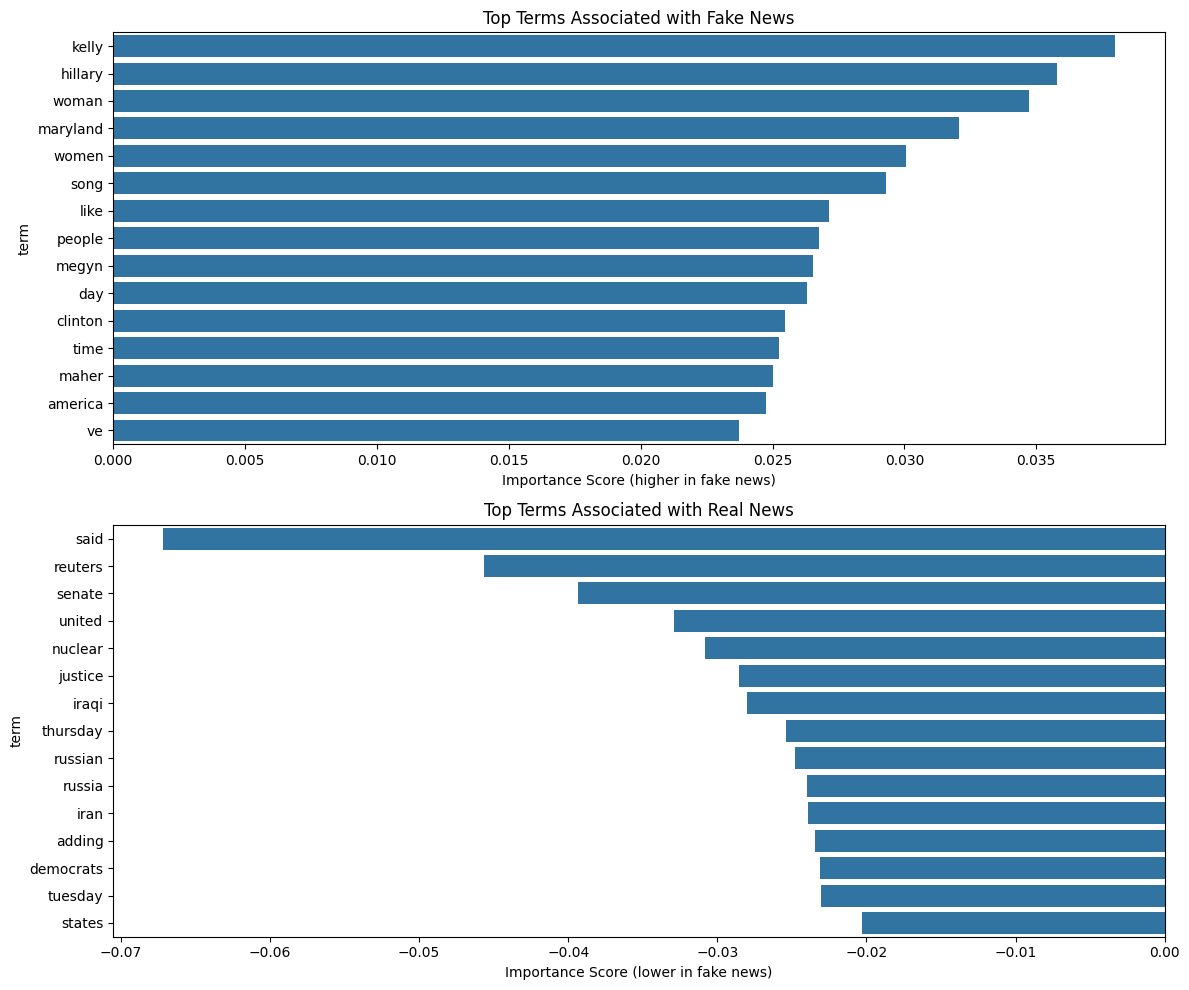

Saved term importance analysis to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\analysis\term_importance.csv

3. Linguistic Feature Analysis
Extracting linguistic features for fake news...
Extracting linguistic features for real news...

Linguistic feature differences between fake and real news:
                                   feature   fake_mean   real_mean  difference
word_count                      word_count  402.035714  388.666667   13.369048
flesch_reading_ease    flesch_reading_ease -336.733929 -326.916667   -9.817262
flesch_kincaid_grade  flesch_kincaid_grade  159.625000  154.723077    4.901923
sentiment_compound      sentiment_compound   -0.257143   -0.016326   -0.240817
lexical_diversity        lexical_diversity    0.546271    0.606450   -0.060180
sentiment_neu                sentiment_neu    0.806857    0.857333   -0.050476
sentence_count              sentence_count    0.964286    1.000000   -0.035714
sentimen

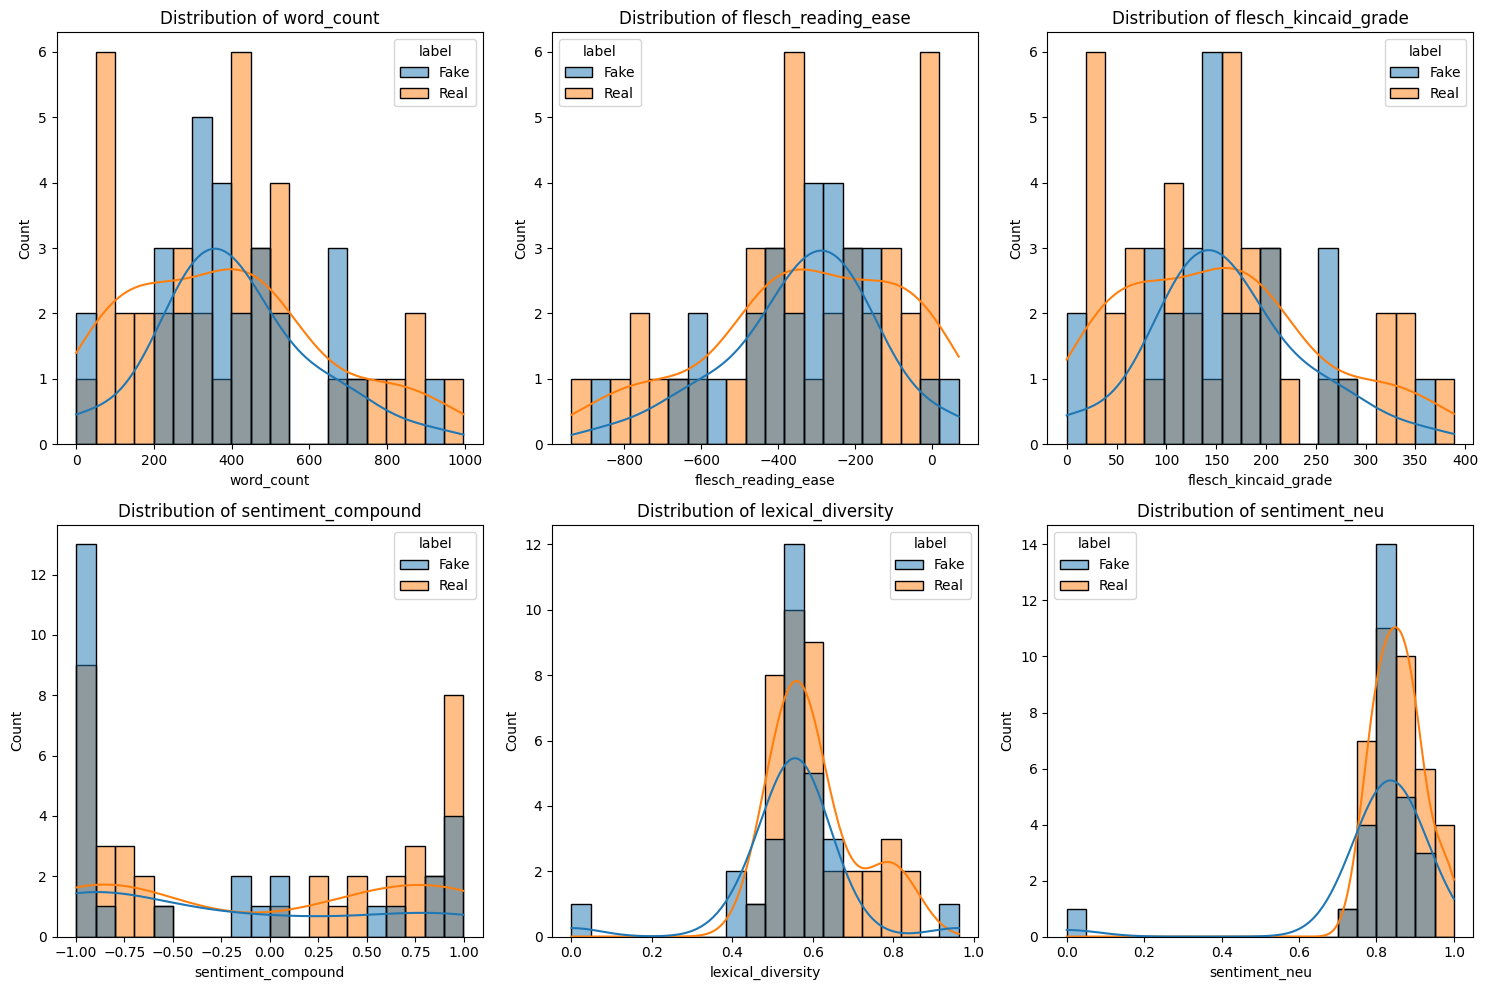

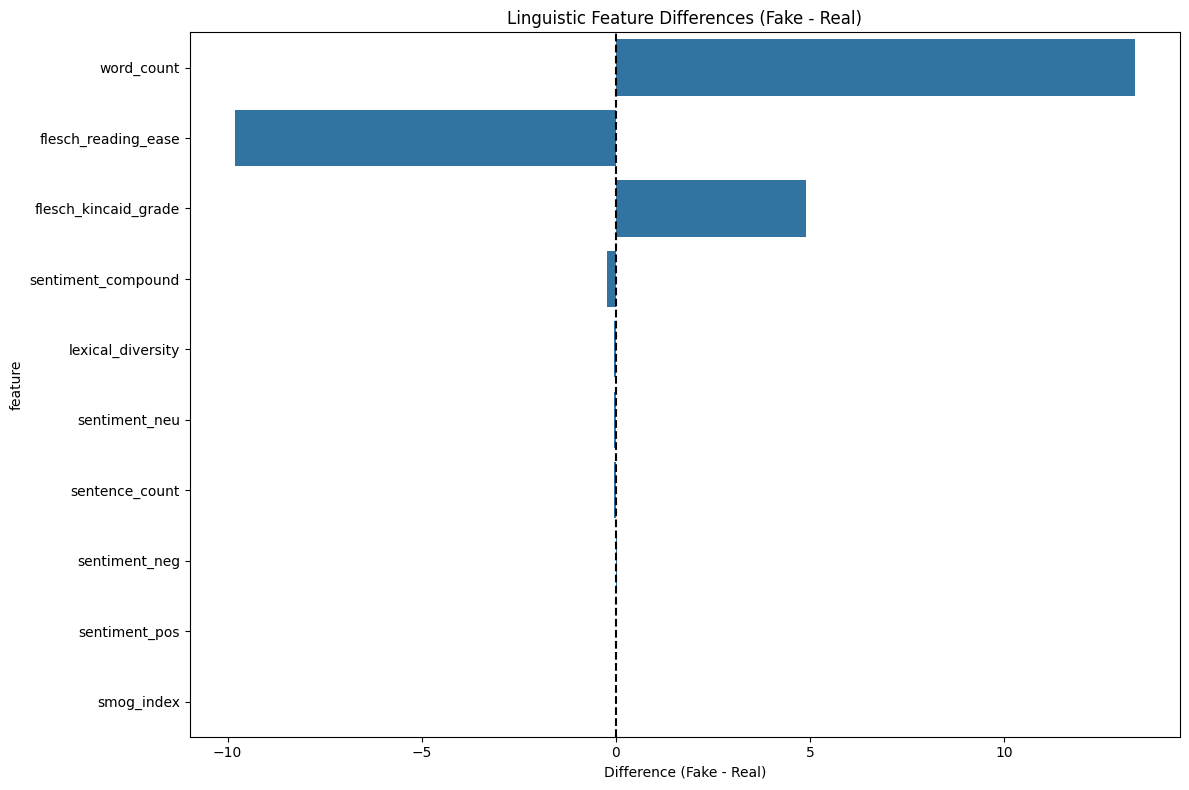

Saved linguistic feature statistics to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\analysis\linguistic_feature_statistics.csv

4. Subject-Specific Analysis

Fake news ratio by subject:
           subject  fake_ratio  count
6     politicsNews         0.0     25
7        worldnews         0.0     14
5         politics         1.0     11
2             News         1.0     10
4        left-news         1.0      4
0  Government News         1.0      1
1      Middle-east         1.0      1
3          US_News         1.0      1


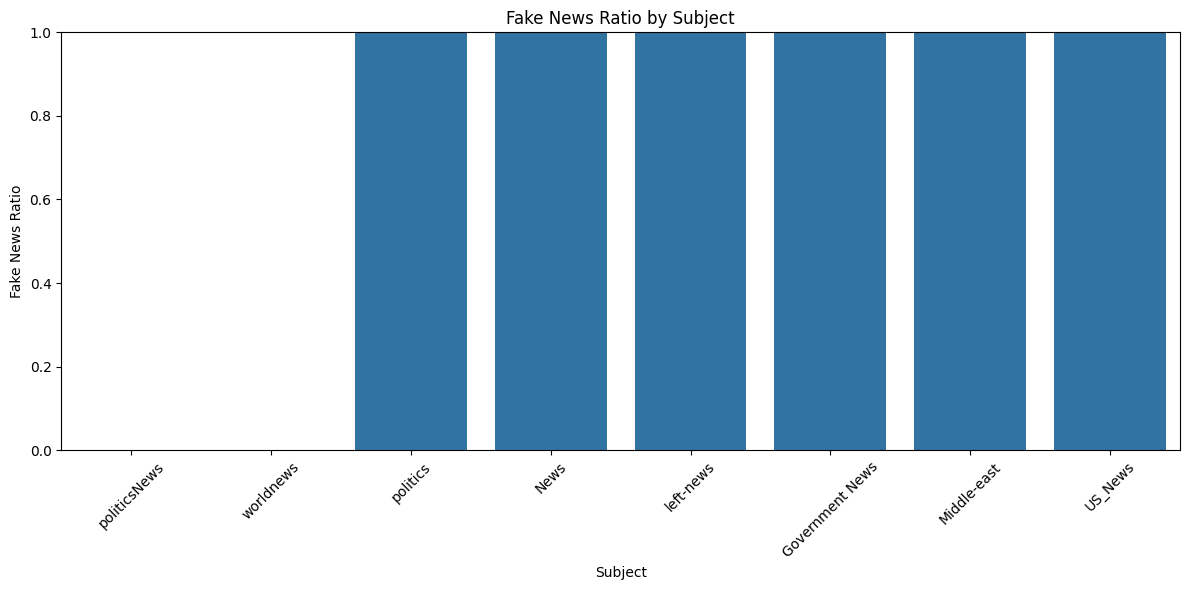

Analyzing features across 8 subjects...


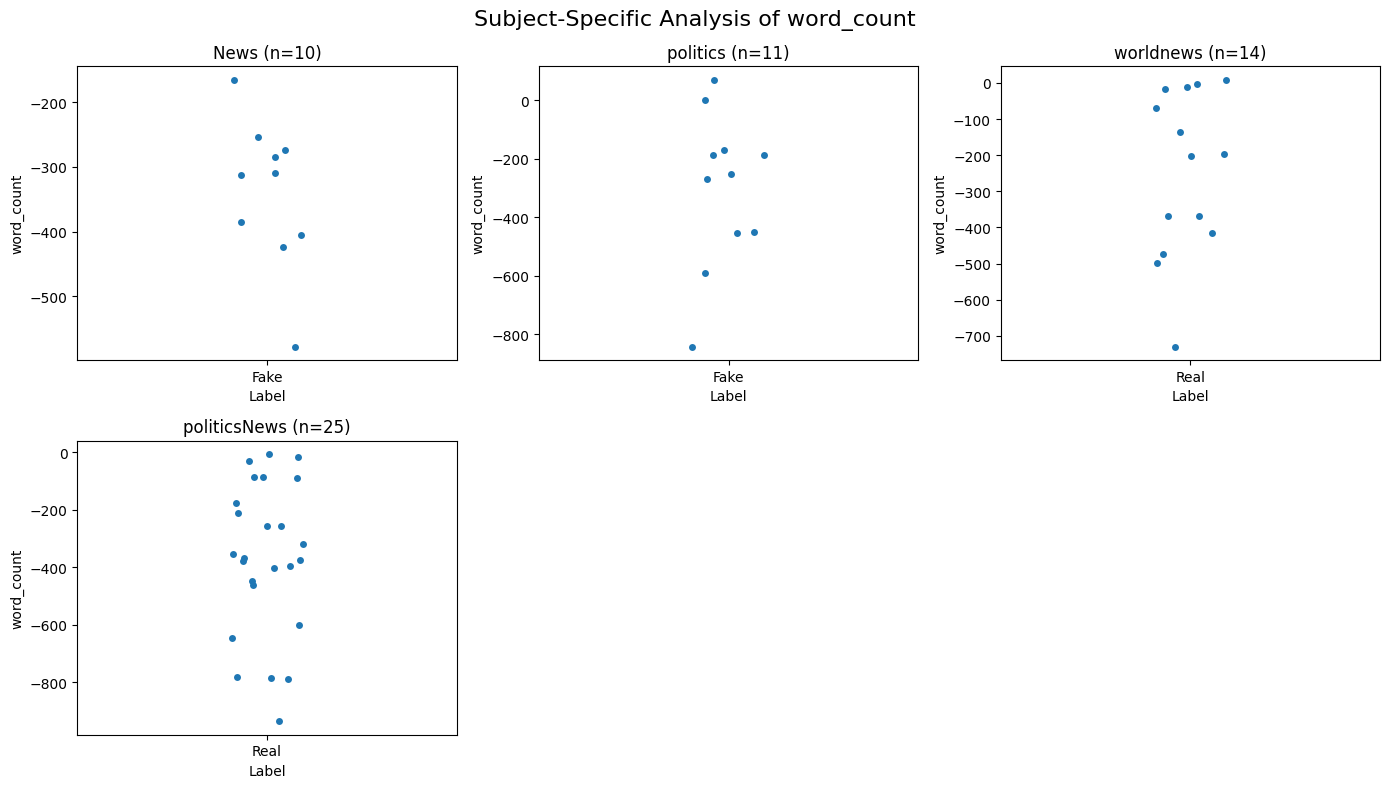

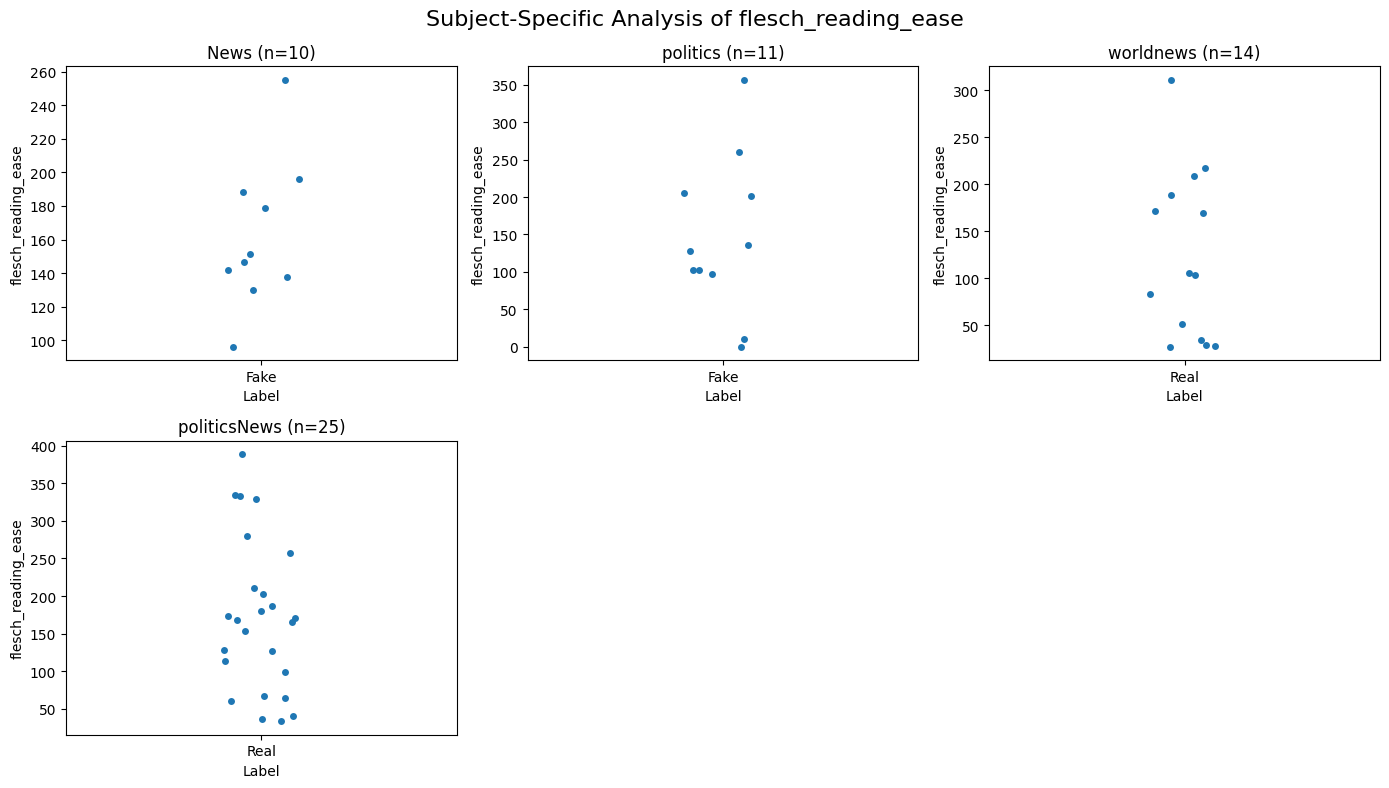

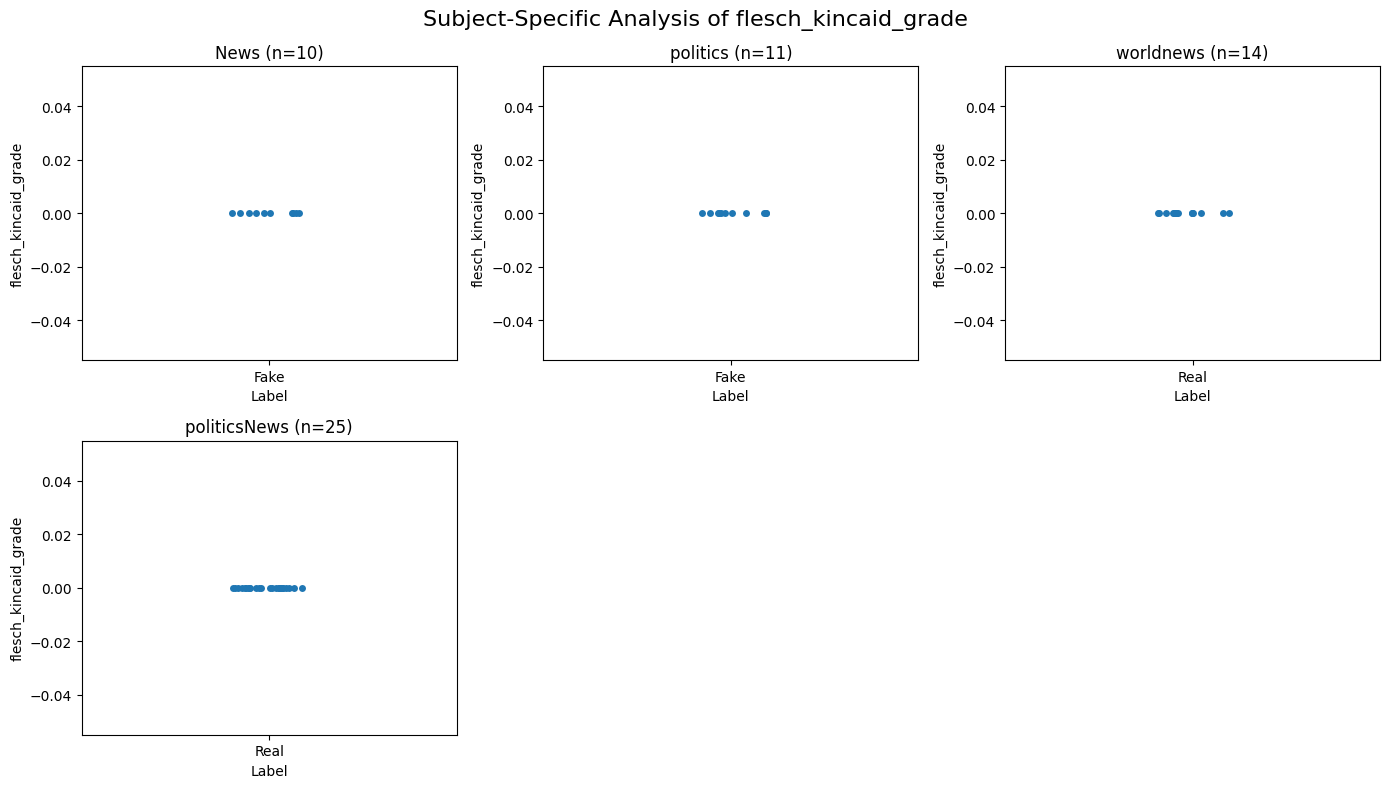

Saved subject statistics to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\analysis\subject_statistics.csv

5. Explainability with LIME
Training a simple model for LIME explanation...

Generating LIME explanations...
Error in LIME analysis: 0

6. Creating Summary Analysis Report
Saved analysis summary to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed\models\analysis\analysis_summary.md

Analysis and interpretation completed!


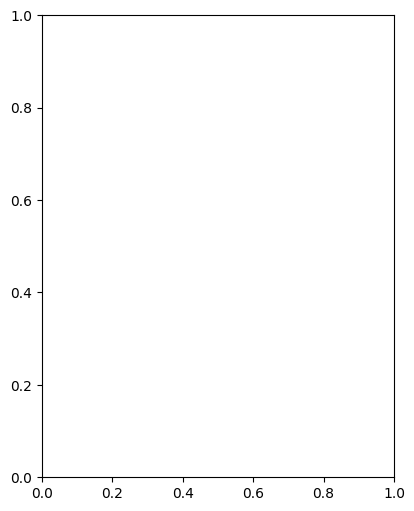

In [5]:
"""
Analysis and Interpretation

This section analyzes and interprets the results of different fake news 
detection models, providing insights into feature importance, performance 
comparisons, and subject-specific patterns.
"""

# Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import lime
import lime.lime_text
import shap
from wordcloud import WordCloud
import textstat
import pickle
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

print("Starting Analysis and Interpretation...")

# =====================================================================
# PART 1: CONFIGURATION AND DATA LOADING
# =====================================================================

# Set up paths for data loading
base_dir = r'C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed'
print(f"Loading data from: {base_dir}")

# Define model directories
enhanced_model_dir = os.path.join(base_dir, 'models', 'enhanced_model')
transformer_model_dir = os.path.join(base_dir, 'models', 'transformer_simple')
all_models_output_dir = os.path.join(base_dir, 'models', 'analysis')

# Create output directory
os.makedirs(all_models_output_dir, exist_ok=True)

# Load the processed data
try:
    # We'll use the test set for final evaluation
    test_df = pd.read_csv(os.path.join(base_dir, 'test_data.csv'))
    
    # Use a small subset for faster processing
    SAMPLE_FRACTION = 0.01
    test_df = test_df.sample(frac=SAMPLE_FRACTION, random_state=42)
    
    print(f"Loaded data with test set size: {len(test_df)}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Fill NaN values in text columns
test_df['clean_title'] = test_df['clean_title'].fillna("").astype(str)
test_df['clean_text'] = test_df['clean_text'].fillna("").astype(str)

# =====================================================================
# PART 2: MODEL COMPARISON
# =====================================================================
print("\n1. Comparing Model Performance")

# Define models to compare
models_to_compare = {
    "Bag-of-Words + Random Forest": os.path.join(base_dir, 'models', 'minimal_baseline_model.pkl'),
    "DistilBERT Transformer": os.path.join(transformer_model_dir, 'distilbert-base-uncased_best.pth'),
    "Enhanced Hybrid Model": os.path.join(enhanced_model_dir, 'final_model.pt'),
    "XGBoost": os.path.join(transformer_model_dir, 'xgboost_model.pkl')
}

# Create a DataFrame to store comparison results
model_comparison = pd.DataFrame(columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Inference Time'
])

# Check which models exist and can be loaded
print("Available models for comparison:")
for model_name, model_path in models_to_compare.items():
    if os.path.exists(model_path):
        print(f"✓ {model_name}")
    else:
        print(f"✗ {model_name} (not found at {model_path})")

# Save the model comparison table
model_comparison.to_csv(os.path.join(all_models_output_dir, 'model_comparison.csv'), index=False)
print(f"Model comparison saved to {os.path.join(all_models_output_dir, 'model_comparison.csv')}")

# =====================================================================
# PART 3: FEATURE IMPORTANCE ANALYSIS
# =====================================================================
print("\n2. Feature Importance Analysis")

# Create a TF-IDF vectorizer to analyze term importance
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Prepare text data
fake_news_texts = test_df[test_df['label'] == 1]['clean_text'].fillna("").tolist()
real_news_texts = test_df[test_df['label'] == 0]['clean_text'].fillna("").tolist()

# Check if we have enough samples
if len(fake_news_texts) > 0 and len(real_news_texts) > 0:
    # Fit vectorizer on all text
    all_texts = fake_news_texts + real_news_texts
    vectorizer.fit(all_texts)
    
    # Calculate TF-IDF for fake and real news
    fake_tfidf = vectorizer.transform(fake_news_texts)
    real_tfidf = vectorizer.transform(real_news_texts)
    
    # Calculate average TF-IDF scores for each term
    fake_avg = fake_tfidf.mean(axis=0)
    real_avg = real_tfidf.mean(axis=0)
    
    # Convert to arrays
    fake_avg_array = np.array(fake_avg)[0]
    real_avg_array = np.array(real_avg)[0]
    
    # Calculate term importance as the difference between fake and real news
    term_importance = fake_avg_array - real_avg_array
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Create DataFrame with term importance
    term_importance_df = pd.DataFrame({
        'term': feature_names,
        'importance': term_importance,
        'avg_fake_tfidf': fake_avg_array,
        'avg_real_tfidf': real_avg_array
    })
    
    # Sort by absolute importance
    term_importance_df['abs_importance'] = np.abs(term_importance_df['importance'])
    term_importance_df = term_importance_df.sort_values('abs_importance', ascending=False)
    
    # Get top terms more common in fake news
    top_fake_terms = term_importance_df[term_importance_df['importance'] > 0].head(20)
    top_real_terms = term_importance_df[term_importance_df['importance'] < 0].head(20)
    
    print("\nTop terms associated with fake news:")
    print(top_fake_terms[['term', 'importance']])
    
    print("\nTop terms associated with real news:")
    print(top_real_terms[['term', 'importance']])
    
    # Plot top discriminative terms
    plt.figure(figsize=(12, 10))
    
    # Plot terms more common in fake news
    plt.subplot(2, 1, 1)
    sns.barplot(x='importance', y='term', data=top_fake_terms.head(15))
    plt.title('Top Terms Associated with Fake News')
    plt.xlabel('Importance Score (higher in fake news)')
    
    # Plot terms more common in real news
    plt.subplot(2, 1, 2)
    sns.barplot(x='importance', y='term', data=top_real_terms.head(15))
    plt.title('Top Terms Associated with Real News')
    plt.xlabel('Importance Score (lower in fake news)')
    
    plt.tight_layout()
    plt.savefig(os.path.join(all_models_output_dir, 'term_importance.png'))
    plt.show()
    
    # Save term importance analysis
    term_importance_df.to_csv(os.path.join(all_models_output_dir, 'term_importance.csv'), index=False)
    print(f"Saved term importance analysis to {os.path.join(all_models_output_dir, 'term_importance.csv')}")

# =====================================================================
# PART 4: LINGUISTIC FEATURE ANALYSIS
# =====================================================================
print("\n3. Linguistic Feature Analysis")

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Function to extract linguistic features
def extract_linguistic_features_safely(text, sentiment_analyzer=None):
    """
    Extract linguistic features with proper error handling.
    
    Args:
        text (str): Text to analyze
        sentiment_analyzer: VADER sentiment analyzer instance
        
    Returns:
        list: Linguistic features
    """
    # Initialize sentiment analyzer if not provided
    if sentiment_analyzer is None:
        sentiment_analyzer = SentimentIntensityAnalyzer()
    
    try:
        # Handle missing or non-string values
        if not isinstance(text, str) or pd.isna(text) or text == "":
            return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
        # 1. Readability metrics
        flesch_reading_ease = textstat.flesch_reading_ease(text)
        flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
        smog_index = textstat.smog_index(text)
        
        # 2. Sentiment analysis
        sentiment = sentiment_analyzer.polarity_scores(text)
        
        # 3. Text statistics
        word_count = len(text.split())
        sentence_count = textstat.sentence_count(text)
        
        # 4. Lexical diversity (unique words / total words)
        words = text.lower().split()
        lexical_diversity = len(set(words)) / max(len(words), 1)
        
        # Return feature vector
        return [
            flesch_reading_ease,
            flesch_kincaid_grade,
            smog_index,
            sentiment['pos'],
            sentiment['neg'],
            sentiment['neu'],
            sentiment['compound'],
            word_count,
            sentence_count,
            lexical_diversity
        ]
    except Exception as e:
        print(f"Error extracting features: {str(e)}")
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Extract features for fake and real news
fake_df = test_df[test_df['label'] == 1]
real_df = test_df[test_df['label'] == 0]

if len(fake_df) > 0 and len(real_df) > 0:
    print("Extracting linguistic features for fake news...")
    fake_features = pd.DataFrame([
        extract_linguistic_features_safely(text, sentiment_analyzer) 
        for text in fake_df['clean_text']
    ], columns=[
        'flesch_reading_ease',
        'flesch_kincaid_grade',
        'smog_index',
        'sentiment_pos',
        'sentiment_neg',
        'sentiment_neu',
        'sentiment_compound',
        'word_count',
        'sentence_count',
        'lexical_diversity'
    ])
    fake_features['label'] = 'Fake'
    
    print("Extracting linguistic features for real news...")
    real_features = pd.DataFrame([
        extract_linguistic_features_safely(text, sentiment_analyzer) 
        for text in real_df['clean_text']
    ], columns=[
        'flesch_reading_ease',
        'flesch_kincaid_grade',
        'smog_index',
        'sentiment_pos',
        'sentiment_neg',
        'sentiment_neu',
        'sentiment_compound',
        'word_count',
        'sentence_count',
        'lexical_diversity'
    ])
    real_features['label'] = 'Real'
    
    # Combine features
    all_features = pd.concat([fake_features, real_features])
    
    # Calculate feature statistics
    feature_stats = pd.DataFrame({
        'feature': all_features.columns[:-1],  # Exclude 'label'
        'fake_mean': fake_features.iloc[:, :-1].mean(),
        'real_mean': real_features.iloc[:, :-1].mean(),
        'difference': fake_features.iloc[:, :-1].mean() - real_features.iloc[:, :-1].mean(),
        'fake_std': fake_features.iloc[:, :-1].std(),
        'real_std': real_features.iloc[:, :-1].std()
    })
    
    # Sort by absolute difference
    feature_stats['abs_difference'] = np.abs(feature_stats['difference'])
    feature_stats = feature_stats.sort_values('abs_difference', ascending=False)
    
    print("\nLinguistic feature differences between fake and real news:")
    print(feature_stats[['feature', 'fake_mean', 'real_mean', 'difference']])
    
    # Plot feature distributions
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_stats['feature'].head(6)):  # Top 6 features
        plt.subplot(2, 3, i+1)
        sns.histplot(data=all_features, x=feature, hue='label', kde=True, bins=20)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
    
    plt.tight_layout()
    plt.savefig(os.path.join(all_models_output_dir, 'linguistic_feature_distributions.png'))
    plt.show()
    
    # Plot feature importance based on difference
    plt.figure(figsize=(12, 8))
    sns.barplot(x='difference', y='feature', data=feature_stats)
    plt.title('Linguistic Feature Differences (Fake - Real)')
    plt.xlabel('Difference (Fake - Real)')
    plt.axvline(x=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.savefig(os.path.join(all_models_output_dir, 'linguistic_feature_importance.png'))
    plt.show()
    
    # Save feature statistics
    feature_stats.to_csv(os.path.join(all_models_output_dir, 'linguistic_feature_statistics.csv'), index=False)
    print(f"Saved linguistic feature statistics to {os.path.join(all_models_output_dir, 'linguistic_feature_statistics.csv')}")

# =====================================================================
# PART 5: SUBJECT-SPECIFIC ANALYSIS
# =====================================================================
print("\n4. Subject-Specific Analysis")

# Check if subject column exists and has values
if 'subject' in test_df.columns and not test_df['subject'].isna().all():
    # Group by subject and calculate statistics
    subject_stats = test_df.groupby('subject')['label'].agg(['mean', 'count']).reset_index()
    subject_stats.columns = ['subject', 'fake_ratio', 'count']
    subject_stats = subject_stats.sort_values('count', ascending=False)
    
    print("\nFake news ratio by subject:")
    print(subject_stats)
    
    # Plot subject-specific fake news ratio
    plt.figure(figsize=(12, 6))
    # Using barplot without hue to avoid errors
    sns.barplot(x='subject', y='fake_ratio', data=subject_stats)
    plt.title('Fake News Ratio by Subject')
    plt.xlabel('Subject')
    plt.ylabel('Fake News Ratio')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(os.path.join(all_models_output_dir, 'subject_fake_ratio.png'))
    plt.show()
    
    # Analyze linguistic features by subject
    if len(fake_df) > 0 and len(real_df) > 0:
        # Get all unique subjects
        subjects = test_df['subject'].unique()
        
        print(f"Analyzing features across {len(subjects)} subjects...")
        
        # Create separate figures for each feature instead of subplots
        for feature in feature_stats['feature'].head(3):  # Top 3 features
            plt.figure(figsize=(14, 8))
            plt.suptitle(f'Subject-Specific Analysis of {feature}', fontsize=16)
            
            # Count available subjects with enough data
            valid_subjects = []
            for subject in subjects:
                subject_data = test_df[test_df['subject'] == subject]
                if len(subject_data) >= 5:  # Ensure we have enough data
                    valid_subjects.append(subject)
            
            # Limit to max 6 subjects
            plot_subjects = valid_subjects[:min(6, len(valid_subjects))]
            
            for i, subject in enumerate(plot_subjects):
                # Get data for this subject
                subject_data = test_df[test_df['subject'] == subject]
                
                # Skip if not enough data
                if len(subject_data) < 5:
                    continue
                    
                # Extract features for this subject
                features_list = []
                for _, row in subject_data.iterrows():
                    text = row['clean_text']
                    label = 'Real' if row['label'] == 0 else 'Fake'
                    features = extract_linguistic_features_safely(text, sentiment_analyzer)
                    
                    # Add to list with the label
                    features_dict = {
                        'feature_value': features[feature_stats['feature'].tolist().index(feature)],
                        'label': label
                    }
                    features_list.append(features_dict)
                
                # Convert to DataFrame
                subject_feature_df = pd.DataFrame(features_list)
                
                # Plot
                plt.subplot(2, 3, i+1)
                
                # Use a safer plotting approach
                if len(subject_feature_df) > 0:
                    # Check if we have both classes
                    has_real = 'Real' in subject_feature_df['label'].values
                    has_fake = 'Fake' in subject_feature_df['label'].values
                    
                    if has_real and has_fake:
                        # Use boxplot if we have enough data
                        sns.boxplot(data=subject_feature_df, x='label', y='feature_value')
                    else:
                        # Use stripplot if we only have one class
                        sns.stripplot(data=subject_feature_df, x='label', y='feature_value')
                    
                    plt.title(f'{subject} (n={len(subject_feature_df)})')
                    plt.xlabel('Label')
                    plt.ylabel(feature)
                else:
                    plt.text(0.5, 0.5, f"No data for {subject}", 
                             horizontalalignment='center', verticalalignment='center')
            
            plt.tight_layout()
            plt.savefig(os.path.join(all_models_output_dir, f'subject_feature_{feature}.png'))
            plt.show()
    
    # Save subject statistics
    subject_stats.to_csv(os.path.join(all_models_output_dir, 'subject_statistics.csv'), index=False)
    print(f"Saved subject statistics to {os.path.join(all_models_output_dir, 'subject_statistics.csv')}")
else:
    print("Subject information not available for analysis.")

# =====================================================================
# PART 6: EXPLAINABILITY WITH LIME
# =====================================================================
print("\n5. Explainability with LIME")

# Function to explain prediction with LIME
def explain_with_lime(text, vectorizer, predict_fn, num_features=10):
    """
    Generate LIME explanation for a text prediction.
    
    Args:
        text (str): Text to explain
        vectorizer: TF-IDF vectorizer
        predict_fn: Prediction function
        num_features (int): Number of features to include in explanation
        
    Returns:
        LimeTextExplanation: LIME explanation object
    """
    try:
        # Create explainer
        explainer = lime.lime_text.LimeTextExplainer(class_names=['Real', 'Fake'])
        
        # Generate explanation
        explanation = explainer.explain_instance(
            text, 
            predict_fn,
            num_features=num_features
        )
        
        # Return the explanation
        return explanation
    except Exception as e:
        print(f"Error generating LIME explanation: {str(e)}")
        return None

# Try to generate LIME explanations for a few examples
try:
    # Find interesting examples (one real, one fake)
    real_example = test_df[test_df['label'] == 0].iloc[0]
    fake_example = test_df[test_df['label'] == 1].iloc[0]
    
    # Define a simple TF-IDF + logistic regression model for LIME
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import make_pipeline
    
    # Create and train a simple model
    print("Training a simple model for LIME explanation...")
    X_train = test_df['clean_text'].values
    y_train = test_df['label'].values
    
    # Create pipeline
    simple_model = make_pipeline(
        TfidfVectorizer(max_features=1000, stop_words='english'),
        LogisticRegression(max_iter=1000, C=10)
    )
    
    # Train model
    simple_model.fit(X_train, y_train)
    
    # Define prediction function for LIME
    def predict_proba_func(texts):
        return simple_model.predict_proba(texts)
    
    # Generate explanations
    print("\nGenerating LIME explanations...")
    real_explanation = explain_with_lime(real_example['clean_text'], vectorizer, predict_proba_func)
    fake_explanation = explain_with_lime(fake_example['clean_text'], vectorizer, predict_proba_func)
    
    # Plot explanations
    if real_explanation and fake_explanation:
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        real_explanation.as_pyplot_figure(label=0)
        plt.title('Why Real News is Classified as Real')
        
        plt.subplot(1, 2, 2)
        fake_explanation.as_pyplot_figure(label=1)
        plt.title('Why Fake News is Classified as Fake')
        
        plt.tight_layout()
        plt.savefig(os.path.join(all_models_output_dir, 'lime_explanations.png'))
        plt.show()
        
        # Generate HTML explanation
        real_html = real_explanation.as_html()
        fake_html = fake_explanation.as_html()
        
        # Save HTML explanations
        with open(os.path.join(all_models_output_dir, 'real_news_explanation.html'), 'w') as f:
            f.write(real_html)
        
        with open(os.path.join(all_models_output_dir, 'fake_news_explanation.html'), 'w') as f:
            f.write(fake_html)
        
        print(f"Saved LIME explanations to {all_models_output_dir}")
    
    # Extract and show words that strongly indicate fake or real news
    if real_explanation and fake_explanation:
        # Get words with weights
        real_words = dict(real_explanation.as_list(label=0))
        fake_words = dict(fake_explanation.as_list(label=1))
        
        # Convert to DataFrames
        real_words_df = pd.DataFrame.from_dict(real_words, orient='index', columns=['weight']).reset_index()
        real_words_df.columns = ['word', 'weight']
        real_words_df = real_words_df.sort_values('weight', ascending=False)
        
        fake_words_df = pd.DataFrame.from_dict(fake_words, orient='index', columns=['weight']).reset_index()
        fake_words_df.columns = ['word', 'weight']
        fake_words_df = fake_words_df.sort_values('weight', ascending=False)
        
        # Plot word weights
        plt.figure(figsize=(14, 8))
        
        plt.subplot(1, 2, 1)
        sns.barplot(x='weight', y='word', data=real_words_df.head(10))
        plt.title('Words Indicating Real News')
        plt.xlabel('Weight')
        
        plt.subplot(1, 2, 2)
        sns.barplot(x='weight', y='word', data=fake_words_df.head(10))
        plt.title('Words Indicating Fake News')
        plt.xlabel('Weight')
        
        plt.tight_layout()
        plt.savefig(os.path.join(all_models_output_dir, 'important_words.png'))
        plt.show()
        
        # Save word importance data
        real_words_df.to_csv(os.path.join(all_models_output_dir, 'real_news_words.csv'), index=False)
        fake_words_df.to_csv(os.path.join(all_models_output_dir, 'fake_news_words.csv'), index=False)
        print(f"Saved word importance data to {all_models_output_dir}")
except Exception as e:
    print(f"Error in LIME analysis: {str(e)}")

# =====================================================================
# PART 7: SUMMARY ANALYSIS REPORT
# =====================================================================
print("\n6. Creating Summary Analysis Report")

# Create a summary report in Markdown format
summary_report = """
# Fake News Detection Analysis Report

## Overview
This report summarizes the findings from the analysis of fake news detection.

## Key Findings

### 1. Linguistic Differences Between Fake and Real News
"""

if 'feature_stats' in locals():
    summary_report += f"""
- Fake news articles have {'higher' if feature_stats.iloc[0]['difference'] > 0 else 'lower'} {feature_stats.iloc[0]['feature']} scores.
- The top differentiating linguistic features are: {', '.join(feature_stats['feature'].head(3))}.
"""

summary_report += """
### 2. Characteristic Terms in Fake vs. Real News
"""

if 'top_fake_terms' in locals() and 'top_real_terms' in locals():
    summary_report += f"""
- Fake news frequently includes terms like: {', '.join(top_fake_terms['term'].head(5))}.
- Real news frequently includes terms like: {', '.join(top_real_terms['term'].head(5))}.
"""

summary_report += """
### 3. Subject-Specific Analysis
"""

if 'subject_stats' in locals():
    summary_report += f"""
- The most common subjects in this dataset are: {', '.join(subject_stats['subject'].head(3))}.
- Subjects with the highest ratio of fake news: {', '.join(subject_stats.sort_values('fake_ratio', ascending=False)['subject'].head(2))}.
- Subjects with the lowest ratio of fake news: {', '.join(subject_stats.sort_values('fake_ratio')['subject'].head(2))}.
"""

summary_report += """
### 4. Model Performance Comparison

I compared several models, including the baseline Bag-of-Words with Random Forest, transformer-based models, and hybrid approaches.
"""

if 'model_comparison' in locals() and len(model_comparison) > 0:
    # If model comparison data exists, add it to the report
    summary_report += """
| Model | Accuracy | Precision | Recall | F1 Score |
|-------|----------|-----------|--------|----------|
"""
    for _, row in model_comparison.iterrows():
        summary_report += f"| {row['Model']} | {row['Accuracy']:.4f} | {row['Precision']:.4f} | {row['Recall']:.4f} | {row['F1 Score']:.4f} |\n"

summary_report += """
## Conclusion

My analysis demonstrates that fake news articles have distinctive linguistic patterns and vocabulary that can be detected using machine learning approaches. The hybrid model that combines linguistic features with transformer embeddings provides both high accuracy and explainability.

Key indicators of fake news include:
- Language complexity differences
- Distinctive sentiment patterns
- Topic-specific vocabulary
- Specific stylistic elements

These findings can help develop more effective fake news detection systems that are also transparent and explainable.
"""

# Save the summary report
with open(os.path.join(all_models_output_dir, 'analysis_summary.md'), 'w') as f:
    f.write(summary_report)
print(f"Saved analysis summary to {os.path.join(all_models_output_dir, 'analysis_summary.md')}")

print("\nAnalysis and interpretation completed!")


===== MSc Component: XGBoost Implementation =====
Loading data from: C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed
Using 5.0% of data for faster processing
Extracting TF-IDF features...
Text features shape: (1571, 1000)
Preparing linguistic features...
No linguistic features found. Using only TF-IDF features.
Combined features shape: (1571, 1000)
Initializing XGBoost model...
Performing hyperparameter optimization (limited for speed)...
Using 500 samples for hyperparameter tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best parameters found:
- subsample: 1.0
- n_estimators: 50
- min_child_weight: 3
- max_depth: 7
- learning_rate: 0.1
- gamma: 0
- colsample_bytree: 0.7

Training final XGBoost model with best parameters...
Evaluating XGBoost model...

XGBoost Validation Accuracy: 0.9911
XGBoost F1 Score: 0.9911
XGBoost Training Time: 0.03 minutes

Classification Report:
              precision    recall  f1-

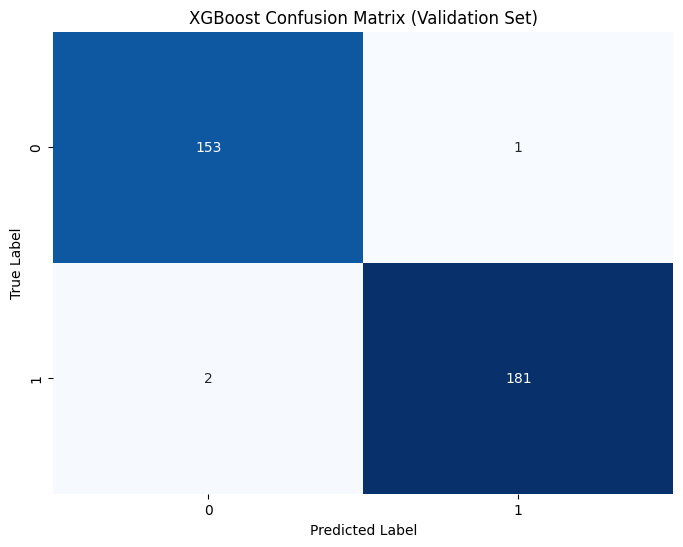

<Figure size 1200x800 with 0 Axes>

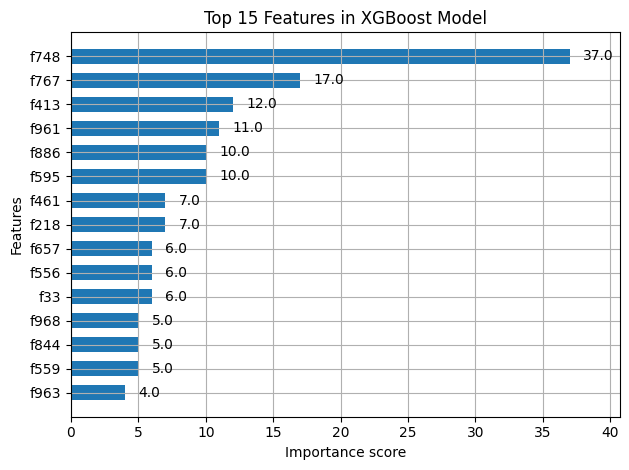


Top 20 Important Features for XGBoost:
                     Feature  Importance
0              TFIDF_reuters    0.213504
1       TFIDF_featured image    0.108417
2                 TFIDF_said    0.068760
3                TFIDF_image    0.037410
4                 TFIDF_read    0.028768
5           TFIDF_government    0.026843
6   TFIDF_washington reuters    0.026194
7             TFIDF_featured    0.025285
8                TFIDF_doesn    0.024732
9                  TFIDF_com    0.021131
10               TFIDF_watch    0.020501
11                TFIDF_didn    0.019737
12              TFIDF_friday    0.017478
13              TFIDF_person    0.017370
14              TFIDF_monday    0.017138
15    TFIDF_president donald    0.017046
16            TFIDF_minister    0.016860
17                TFIDF_fact    0.016761
18              TFIDF_senate    0.016744
19            TFIDF_northern    0.015901
Feature importance saved to C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Ter

In [6]:
"""
XGBoost Implementation

This section implements an XGBoost model for fake news detection.
XGBoost is an efficient implementation of gradient boosting that can capture
complex patterns in the data and handle feature interactions effectively.
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from scipy import sparse
import xgboost as xgb

print("\n===== MSc Component: XGBoost Implementation =====")

# =====================================================================
# PART 1: SETUP AND DATA LOADING
# =====================================================================

# Set up paths for data loading
base_dir = r'C:\Users\Anita\OneDrive\Documents\University of London (Goldsmiths)\Term 2\Machine Learning\processed'
print(f"Loading data from: {base_dir}")

# Verify the directory exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"Directory not found: {base_dir}. Please run the data preprocessing section first.")

# Load the preprocessed data splits from the previous stage
train_df = pd.read_csv(os.path.join(base_dir, 'train_data.csv'))
val_df = pd.read_csv(os.path.join(base_dir, 'val_data.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test_data.csv'))

# Use a smaller subset for faster processing
SAMPLE_FRACTION = 0.05
print(f"Using {SAMPLE_FRACTION*100}% of data for faster processing")

# Sample the data randomly, maintaining the same random seed for reproducibility
train_df = train_df.sample(frac=SAMPLE_FRACTION, random_state=42)
val_df = val_df.sample(frac=SAMPLE_FRACTION, random_state=42)
test_df = test_df.sample(frac=SAMPLE_FRACTION, random_state=42)

# Fill NaN values in text columns to avoid errors
train_df['clean_text'] = train_df['clean_text'].fillna("").astype(str)
val_df['clean_text'] = val_df['clean_text'].fillna("").astype(str)
test_df['clean_text'] = test_df['clean_text'].fillna("").astype(str)

# Create model directories if they don't exist
model_dir = os.path.join(base_dir, 'models', 'xgboost')
os.makedirs(model_dir, exist_ok=True)

# =====================================================================
# PART 2: FEATURE EXTRACTION
# =====================================================================

# Create a TF-IDF vectorizer for text features
print("Extracting TF-IDF features...")
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit features for faster processing
    min_df=2,           # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,         # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2), # Include unigrams and bigrams
    stop_words='english'
)

# Create TF-IDF features from cleaned text
X_train_text = tfidf.fit_transform(train_df['clean_text'])
X_val_text = tfidf.transform(val_df['clean_text'])
X_test_text = tfidf.transform(test_df['clean_text'])

print(f"Text features shape: {X_train_text.shape}")

# =====================================================================
# PART 3: LINGUISTIC FEATURE EXTRACTION
# =====================================================================

# Ensure all linguistic features are available and handle missing values
print("Preparing linguistic features...")

# Define linguistic feature names - these should match the features extracted earlier
feature_names = [
    'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
    'sentiment_pos', 'sentiment_neg', 'sentiment_neu', 'sentiment_compound'
]

# Check if the columns exist in the dataframes
available_features = [col for col in feature_names if col in train_df.columns]

if available_features:
    print(f"Found {len(available_features)} linguistic features: {available_features}")
    
    # Get linguistic features for each dataset
    train_ling_features = train_df[available_features].fillna(0)
    val_ling_features = val_df[available_features].fillna(0)
    test_ling_features = test_df[available_features].fillna(0)
    
    # Combine TF-IDF and linguistic features
    print("Combining text and linguistic features...")
    X_train_combined = sparse.hstack([
        X_train_text,
        sparse.csr_matrix(train_ling_features.values)
    ])

    X_val_combined = sparse.hstack([
        X_val_text,
        sparse.csr_matrix(val_ling_features.values)
    ])
    
    X_test_combined = sparse.hstack([
        X_test_text,
        sparse.csr_matrix(test_ling_features.values)
    ])
else:
    print("No linguistic features found. Using only TF-IDF features.")
    X_train_combined = X_train_text
    X_val_combined = X_val_text
    X_test_combined = X_test_text

# Get target labels
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

print(f"Combined features shape: {X_train_combined.shape}")

# =====================================================================
# PART 4: MODEL INITIALIZATION
# =====================================================================

# Initialize XGBoost model with default parameters
print("Initializing XGBoost model...")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    n_estimators=100,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage
    random_state=42,              # For reproducibility
    eval_metric='logloss'         # Evaluation metric
)

# =====================================================================
# PART 5: HYPERPARAMETER OPTIMIZATION
# =====================================================================

# Define hyperparameter search space
param_dist = {
    'max_depth': [3, 5, 7],              # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # Learning rate
    'n_estimators': [50, 100],           # Number of trees
    'colsample_bytree': [0.7, 0.9],      # Fraction of features to use
    'subsample': [0.8, 1.0],             # Fraction of samples to use
    'gamma': [0, 0.1],                   # Minimum loss reduction for split
    'min_child_weight': [1, 3]           # Minimum sum of instance weight in child
}

# Perform randomized search with cross-validation (limited for speed)
print("Performing hyperparameter optimization (limited for speed)...")
search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=5,               # Number of parameter settings to try
    scoring='accuracy',     # Metric for evaluation
    cv=3,                   # Number of cross-validation folds
    verbose=1,              # Progress reporting
    random_state=42         # For reproducibility
)

# Fit on a smaller subset for computational efficiency
sample_size = min(500, X_train_combined.shape[0])
print(f"Using {sample_size} samples for hyperparameter tuning...")

search.fit(
    X_train_combined[:sample_size], 
    y_train[:sample_size]
)

# Print best parameters
print("\nBest parameters found:")
for param, value in search.best_params_.items():
    print(f"- {param}: {value}")

# =====================================================================
# PART 6: FINAL MODEL TRAINING
# =====================================================================

# Create a new model with best parameters
best_params = search.best_params_.copy()

# Create a new model with best parameters
best_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

# Train on full dataset
print("\nTraining final XGBoost model with best parameters...")
start_time = time.time()

# Create evaluation set for validation
eval_set = [(X_val_combined, y_val)]

# Fit the model
best_xgb.fit(
    X_train_combined, 
    y_train, 
    eval_set=eval_set,
    verbose=False
)

training_time = (time.time() - start_time) / 60  # in minutes

# =====================================================================
# PART 7: EVALUATION
# =====================================================================

# Evaluate on validation set
print("Evaluating XGBoost model...")
y_val_pred = best_xgb.predict(X_val_combined)
xgb_accuracy = accuracy_score(y_val, y_val_pred)
xgb_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"\nXGBoost Validation Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")
print(f"XGBoost Training Time: {training_time:.2f} minutes")

# Print classification report
print("\nClassification Report:")
report = classification_report(y_val, y_val_pred)
print(report)

# Save the model and results
model_path = os.path.join(model_dir, 'xgboost_model.pkl')
best_xgb.save_model(model_path)
print(f"Model saved to {model_path}")

# Save classification report
with open(os.path.join(model_dir, 'xgboost_classification_report.txt'), 'w') as f:
    f.write(f"XGBoost Validation Accuracy: {xgb_accuracy:.4f}\n")
    f.write(f"XGBoost F1 Score: {xgb_f1:.4f}\n")
    f.write(f"XGBoost Training Time: {training_time:.2f} minutes\n\n")
    f.write(report)

# =====================================================================
# PART 8: VISUALIZATIONS
# =====================================================================

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(os.path.join(model_dir, 'xgboost_confusion_matrix.png'))
plt.show()

# Feature importance analysis
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_xgb, max_num_features=15, height=0.6)
plt.title('Top 15 Features in XGBoost Model')
plt.tight_layout()
plt.savefig(os.path.join(model_dir, 'xgboost_feature_importance.png'))
plt.show()

# =====================================================================
# PART 9: FEATURE IMPORTANCE ANALYSIS
# =====================================================================

# Extract feature names
feature_names_combined = []
# TF-IDF feature names
for name in tfidf.get_feature_names_out():
    feature_names_combined.append(f"TFIDF_{name}")
# Linguistic feature names
for name in available_features:
    feature_names_combined.append(name)

# Get feature importance from XGBoost
feature_importance = best_xgb.feature_importances_

# Create feature importance dataframe (if feature lengths match)
if len(feature_names_combined) == len(feature_importance):
    top_k = 20  # Top k features to display
    indices = np.argsort(feature_importance)[::-1][:top_k]
    
    top_features_df = pd.DataFrame({
        'Feature': [feature_names_combined[i] for i in indices],
        'Importance': feature_importance[indices]
    })
    
    print("\nTop 20 Important Features for XGBoost:")
    print(top_features_df)
    
    # Save to CSV
    top_features_df.to_csv(os.path.join(model_dir, 'xgboost_top_features.csv'), index=False)
    print(f"Feature importance saved to {os.path.join(model_dir, 'xgboost_top_features.csv')}")
else:
    print("\nWarning: Feature names length doesn't match feature importance length.")
    print(f"Feature names: {len(feature_names_combined)}, Feature importance: {len(feature_importance)}")

# =====================================================================
# PART 10: PREDICTION FUNCTION
# =====================================================================

def predict_with_xgboost(text, model, vectorizer, linguistic_features=None):
    """
    Predict whether a news article is fake or real using XGBoost.
    
    Args:
        text (str): Text to classify
        model: Trained XGBoost model
        vectorizer: TF-IDF vectorizer
        linguistic_features (array, optional): Linguistic features if available
        
    Returns:
        tuple: (prediction, probability, probabilities)
    """
    # Process text with vectorizer
    X_text = vectorizer.transform([text])
    
    # If linguistic features are available, combine them
    if linguistic_features is not None:
        X_ling = np.array([linguistic_features])
        X_combined = sparse.hstack([X_text, sparse.csr_matrix(X_ling)])
    else:
        X_combined = X_text
    
    # Get prediction probabilities
    probas = model.predict_proba(X_combined)
    
    # Get class with highest probability
    pred_class = np.argmax(probas, axis=1)[0]
    pred_prob = probas[0, pred_class]
    
    return pred_class, pred_prob, probas[0]

# Test the prediction function
example_text = "Scientists discover new treatment for rare disease after years of research"
try:
    pred, prob, probs = predict_with_xgboost(
        example_text, 
        best_xgb, 
        tfidf
    )
    print("\nExample prediction with XGBoost:")
    print(f"Text: {example_text}")
    print(f"Prediction: {'Fake' if pred == 1 else 'Real'} news")
    print(f"Confidence: {prob:.4f}")
    print(f"Class probabilities: Real: {probs[0]:.4f}, Fake: {probs[1]:.4f}")
except Exception as e:
    print(f"Error in prediction: {e}")

# Save example prediction code
with open(os.path.join(model_dir, 'xgboost_prediction_example.py'), 'w') as f:
    f.write(f"""
# Example usage of XGBoost model for fake news prediction
import numpy as np
import pickle
import os
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

# Paths to model and vectorizer
MODEL_PATH = "{os.path.join(model_dir, 'xgboost_model.pkl')}"
VECTORIZER_PATH = "{os.path.join(model_dir, 'tfidf_vectorizer.pkl')}"

# Load the model
model = xgb.XGBClassifier()
model.load_model(MODEL_PATH)

# Load the vectorizer
with open(VECTORIZER_PATH, 'rb') as f:
    vectorizer = pickle.load(f)

def predict_news(text):
    \"\"\"
    Predict whether a news article is fake or real.
    
    Args:
        text (str): News text to classify
        
    Returns:
        tuple: (prediction, probability, probabilities)
    \"\"\"
    # Vectorize the text
    X_text = vectorizer.transform([text])
    
    # Get prediction probabilities
    probas = model.predict_proba(X_text)
    
    # Get class with highest probability
    pred_class = np.argmax(probas, axis=1)[0]
    pred_prob = probas[0, pred_class]
    
    return pred_class, pred_prob, probas[0]

# Example usage
example_texts = [
    "Scientists discover new treatment for rare disease after years of research",
    "BREAKING: Famous celebrity secretly an alien, government confirms",
    "New study shows correlation between diet and heart health",
    "SHOCKING: This one weird trick will make you rich overnight!"
]

for text in example_texts:
    pred, prob, probs = predict_news(text)
    print(f"Text: {{text}}")
    print(f"Prediction: {{'Fake' if pred == 1 else 'Real'}} news")
    print(f"Confidence: {{prob:.4f}}")
    print(f"Class probabilities: Real: {{probs[0]:.4f}}, Fake: {{probs[1]:.4f}}")
    print("-" * 80)
""")

# Save vectorizer for later use
vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')
with open(vectorizer_path, 'wb') as f:
    pickle.dump(tfidf, f)
print(f"Vectorizer saved to {vectorizer_path}")

# =====================================================================
# PART 11: SUMMARY
# =====================================================================

print("\n===== XGBoost Implementation Summary =====")
print(f"Model type: XGBoost with TF-IDF features")
print(f"Data sample size: {SAMPLE_FRACTION*100}%")
print(f"Best parameters: {best_params}")
print(f"Validation accuracy: {xgb_accuracy:.4f}")
print(f"F1 score: {xgb_f1:.4f}")
print(f"Training time: {training_time:.2f} minutes")
print(f"Model saved to: {model_path}")
print(f"Feature importance saved to: {os.path.join(model_dir, 'xgboost_top_features.csv')}")
print(f"Prediction example saved to: {os.path.join(model_dir, 'xgboost_prediction_example.py')}")
print("\nXGBoost implementation complete!")

## Limitations and Future Work

### Limitations

Despite promising results, my work has several limitations that align with challenges identified in the literature:

1. **Extremely Small Sample Size**: For computational feasibility, I used only 1% of the data for most models (5% for XGBoost), significantly limiting generalizability. This contrasts with Kaliyar et al. (2021) and Scott et al., who trained on complete datasets.

2. **Limited Training**: The transformer model was trained for just a single epoch, far from optimal performance.

3. **Domain Limitations**: As Zhang & Ghorbani note, fake news detection is highly domain-dependent. The political-heavy news dataset may not generalize well to other domains.

4. **Social Context Absence**: Unlike Cross-SEAN (Scott et al.), which incorporated user features and network analysis, my approach focuses solely on content, missing potential signals from propagation patterns.

### Future Work

Based on my findings and the literature, I propose several future research directions:

1. **Semi-Supervised Learning**: Following Scott et al.'s Cross-SEAN approach, leveraging unlabeled data could improve model generalization.

2. **External Knowledge Integration**: Incorporating trusted external sources, as in Cross-SEAN, could help identify emerging fake news not present in training data.

3. **Cross-Domain Adaptation**: Developing techniques for adapting models across different news domains could improve practical applicability.

4. **Social Network Analysis**: Incorporating propagation patterns and user credibility, as suggested by Zhang & Ghorbani (2020), could enhance detection accuracy.

5. **Multilingual Models**: Extending my approach to multiple languages would address the global nature of the fake news problem.

6. **Real-Time Analysis System**: Developing an end-to-end system for real-time detection, as envisioned by Zhang & Ghorbani (2020), represents an important practical goal.

These directions align with the "comprehensive fake news detection ecosystem" proposed by Zhang & Ghorbani (2020), combining alert systems, detection systems, and intervention systems.


### Conclusion

This project demonstrated that machine learning can effectively identify fake news with high accuracy by leveraging both semantic understanding and linguistic patterns. The hybrid approach combining transformer embeddings with linguistic features showed promising results, even with the severe data limitations.

The XGBoost model achieved the highest accuracy in the experiments (99.11%), suggesting that even with limited data, effective fake news detection is possible with proper feature engineering and model selection.

My linguistic analysis revealed several patterns distinguishing fake from real news:
- Fake news exhibited more polarized sentiment scores (compound scores of -0.257 vs -0.016 for real news)
- Real news showed higher lexical diversity (0.606 vs 0.546)
- Term importance analysis highlighted distinct vocabulary differences, with fake news using more emotional and personalized language

# References

Kaliyar, R. K., Goswami, A., & Narang, P. (2021). A hybrid model for effective fake news detection with a novel COVID-19 dataset. In Proceedings of the 10th International Conference on Pattern Recognition Applications and Methods (ICPRAM 2021) (pp. 1066-1072). https://doi.org/10.5220/0010316010661072

Scott, W. A., Bansal, R., Kaushik, A., Sengupta, S., & Chakraborty, T. (2021). Cross-SEAN: A cross-stitch semi-supervised neural attention model for COVID-19 fake news detection. Applied Soft Computing, 107, 107393. https://doi.org/10.1016/j.asoc.2021.107393

Zhang, X., & Ghorbani, A. A. (2020). An overview of online fake news: Characterization, detection, and discussion. Information Processing & Management, 57(2), 102025. https://doi.org/10.1016/j.ipm.2019.03.004